# Progetto Data Mining: Analisys Pandemia COVID-19
---

## Corso Data Mining 2019/2020

## Studente: Mattia Gatto
## Matricola: 216649
---
# SETUP

Assicuriamoci che il seguente notebook funzioni sia in python 2 che 3,
importiamo alcuni moduli di utilità, abilitiamo il plotting delle figure 
di MatplotLib e prepriamo una funzione per salvare le immagini.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from datetime import datetime
from dateutil.parser import parse

#imports pandas
import pandas as ps
from IPython.display import Image
import os
#import warnings and Repress Warnings
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="numpy.ndarray size changed")
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #White Grid
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID= "ProgettoFifa19"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def save_figure(figure, fig_id, tight_layout=False, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    figure.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import warnings
warnings.filterwarnings('ignore')

# Hrule--> "====="
hrule = lambda x : "="*x
Hrule = lambda x,y: "="*(x//2)+y+"="*(x//2)

## Motivazione alla base dello studio 

La COVID-19, o malattia respiratoria acuta da SARS-CoV-2 e più semplicemente malattia da coronavirus 2019 o anche morbo da coronavirus 2019,

è una malattia infettiva respiratoria causata dal virus denominato SARS-CoV-2 appartenente alla famiglia dei coronavirus. 

I primi casi sono stati riscontrati durante la pandemia di COVID-19 del 2019-2020. 

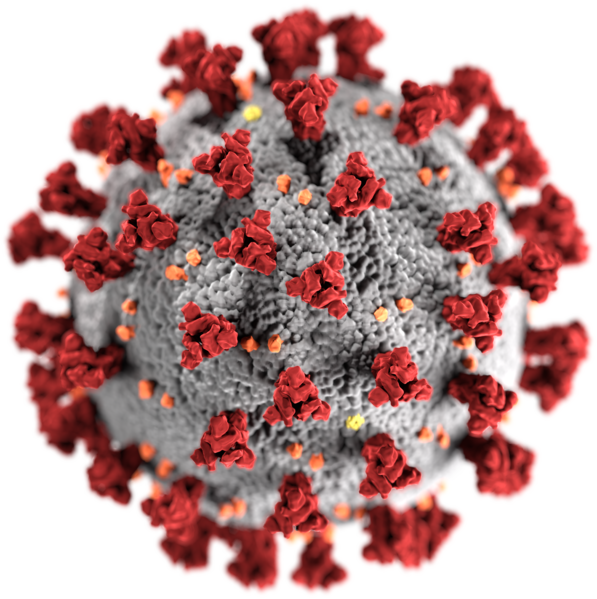

In [2]:
Image(filename=os.path.join(IMAGES_PATH, 'SARS-CoV-2.png'), width=600)

---
# Pre-processing

Carichiamo il Dataset e mostriamo i primi record.

In [3]:
dataset = ps.read_csv("file/full_grouped.csv")
dataset.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

Attraverso la funzione shape vediamo la dimensione del dataset (righe,colonne)

In [4]:
print(dataset.shape)

(28798, 10)


Verifichiamo la presenza di valori mancanti

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28798 entries, 0 to 28797
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            28798 non-null  object
 1   Country/Region  28798 non-null  object
 2   Confirmed       28798 non-null  int64 
 3   Deaths          28798 non-null  int64 
 4   Recovered       28798 non-null  int64 
 5   Active          28798 non-null  int64 
 6   New cases       28798 non-null  int64 
 7   New deaths      28798 non-null  int64 
 8   New recovered   28798 non-null  int64 
 9   WHO Region      28798 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.2+ MB


In [6]:
ps.DataFrame(dataset.isnull().sum()/dataset.shape[0]).T

Date  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0   0.0             0.0        0.0     0.0        0.0     0.0        0.0   

   New deaths  New recovered  WHO Region  
0         0.0            0.0         0.0

In [7]:
dataset.describe()

Confirmed         Deaths      Recovered        Active     New cases  \
count  2.879800e+04   28798.000000   28798.000000  2.879800e+04  28798.000000   
mean   1.373773e+04     837.788353    5354.135634  7.545811e+03    322.461004   
std    8.983372e+04    5626.964861   29567.154321  6.052740e+04   1934.466030   
min    0.000000e+00       0.000000       0.000000  0.000000e+00      0.000000   
25%    0.000000e+00       0.000000       0.000000  0.000000e+00      0.000000   
50%    7.750000e+01       1.000000       9.000000  3.500000e+01      1.000000   
75%    1.675000e+03      36.000000     470.000000  7.910000e+02     43.000000   
max    2.347022e+06  121228.000000  647548.000000  1.578246e+06  54771.000000   

         New deaths  New recovered  
count  28798.000000   28798.000000  
mean      16.582784     158.457046  
std      111.403679    1147.851931  
min    -1918.000000   -2446.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000       9.750000  
max     2620.000000   94305.000000

---
Riordino le colonne derivanti dagli attributi, non vado a considerare le regioni pocihè mi interessano solo i paesi,

Inserisco come indice del mio DataFrame la data e per ogni data definisco gli attributi per ogni nazione.

In [8]:
dati={"Paese":np.array(dataset['Country/Region']),
     "Confermati":np.array(dataset.Confirmed),
     "Nuovi casi":np.array(dataset["New cases"]),
     "Ricoverati":np.array(dataset.Recovered),
     "Nuovi Ricoverati":np.array(dataset["New recovered"]),
     "Morti":np.array(dataset.Deaths),
     "Nuovi morti":np.array(dataset["New deaths"])                        
     }
dates=[datetime.strptime(y, '%Y-%m-%d')for y in dataset.Date]
ts=ps.DataFrame(dati,index=dates)
ts

Paese  Confermati  Nuovi casi  Ricoverati  \
2020-01-22         Afghanistan           0           0           0   
2020-01-22             Albania           0           0           0   
2020-01-22             Algeria           0           0           0   
2020-01-22             Andorra           0           0           0   
2020-01-22              Angola           0           0           0   
...                        ...         ...         ...         ...   
2020-06-23  West Bank and Gaza        1169         168         442   
2020-06-23      Western Sahara          10           0           8   
2020-06-23               Yemen         992          25         356   
2020-06-23              Zambia        1477          47        1213   
2020-06-23            Zimbabwe         525          13          64   

            Nuovi Ricoverati  Morti  Nuovi morti  
2020-01-22                 0      0            0  
2020-01-22                 0      0            0  
2020-01-22                 0      0            0  
2020-01-22                 0      0            0  
2020-01-22                 0      0            0  
...                      ...    ...          ...  
2020-06-23                 0      3            0  
2020-06-23                 0      1            0  
2020-06-23                 6    261            4  
2020-06-23                19     18            7  
2020-06-23                 0      6            0  

[28798 rows x 7 columns]

---
Per questioni di comodità mostro i record relativi alla data del 1-05-2020.

In [9]:
s=ts[datetime(2020, 5, 1):datetime(2020, 5, 1)]
s.loc[datetime(2020, 5, 1)]

Paese  Confermati  Nuovi casi  Ricoverati  \
2020-05-01         Afghanistan        2335         164         310   
2020-05-01             Albania         782           9         488   
2020-05-01             Algeria        4154         148        1821   
2020-05-01             Andorra         745           0         468   
2020-05-01              Angola          30           3          11   
...                        ...         ...         ...         ...   
2020-05-01  West Bank and Gaza         353           9          76   
2020-05-01      Western Sahara           6           0           5   
2020-05-01               Yemen           7           1           1   
2020-05-01              Zambia         109           3          74   
2020-05-01            Zimbabwe          40           0           5   

            Nuovi Ricoverati  Morti  Nuovi morti  
2020-05-01                50     68            4  
2020-05-01                18     31            0  
2020-05-01                42    453            3  
2020-05-01                 0     43            1  
2020-05-01                 4      2            0  
...                      ...    ...          ...  
2020-05-01                 0      2            0  
2020-05-01                 0      0            0  
2020-05-01                 0      2            0  
2020-05-01                19      3            0  
2020-05-01                 0      4            0  

[187 rows x 7 columns]

Vediamo ad esempio la tupla contenente i dati esclusivamente relativi al Paese Italia nel giorno 1-05-2020

In [10]:
stati=np.array(dataset['Country/Region'])
c=-1
for i in stati:
    c=c+1
    if i=='Italy':
        break
s.iloc[c]

Paese                Italy
Confermati          207428
Nuovi casi            1965
Ricoverati           78249
Nuovi Ricoverati      2304
Morti                28236
Nuovi morti            269
Name: 2020-05-01 00:00:00, dtype: object

---
Rieffettuiamo una analisi sui dati dopo aver modificato il Dataset

In [11]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28798 entries, 2020-01-22 to 2020-06-23
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Paese             28798 non-null  object
 1   Confermati        28798 non-null  int64 
 2   Nuovi casi        28798 non-null  int64 
 3   Ricoverati        28798 non-null  int64 
 4   Nuovi Ricoverati  28798 non-null  int64 
 5   Morti             28798 non-null  int64 
 6   Nuovi morti       28798 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.4+ MB


In [12]:
ps.DataFrame(ts.isnull().sum()/ts.shape[0]).T

Paese  Confermati  Nuovi casi  Ricoverati  Nuovi Ricoverati  Morti  \
0    0.0         0.0         0.0         0.0               0.0    0.0   

   Nuovi morti  
0          0.0

Nessun attributo ha valori mancanti.

---
# Inseriamo il livello lockdown
Ora per arricchire il nostro Dataset, Prendiamo un DataFrame esterno che contiene il livello di LockDown adattato per ogni singolo paese,

e lo inseriamo nei paesi di cui dispone il nostro Dataset, sfrtuttando le seguenti operazioni.

Una volta determinato il valore per ogni singolo paese dei 187 all'interno del Dataset originale, costruiamo una lista contenente i valori per ogni singolo Stato.

Alla fine sostituiamo i valori della colonna che corrisponde al Lockdown con quelli della lista da noi creata.

In [13]:
ts['Lockdown']='TOTALE'

paesi=ts[datetime(2020, 5, 1):datetime(2020, 5, 1)]

datasetLockdown = ps.read_csv("file/lockdown/countryLockdowndates.csv")
l=ps.DataFrame(datasetLockdown)
l=l.drop(['Reference','Province'],axis=1)
dati={"Paese":np.array(l['Country/Region']),
      "Date":np.array(l['Date']),
      "Type" :np.array(l['Type'])}
x=ps.DataFrame(dati)

j=0
f=0
for j in range(187):
    if f==x.Paese.size:
        break
    if paesi.iloc[j].Paese==x.loc[f].Paese:
        if x.loc[f].Type=='Partial':
            paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='PARZIALE'
        elif x.loc[f].Type=='Full':
            paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='TOTALE'  
        else:
            paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='NESSUNO'
        f=f+1
    else:
        V=paesi.iloc[j].Paese
        ver=False
        indice=f
        while(ver==False and indice< 186):
            if V==x.loc[indice].Paese:
                ver=True
                break
            indice=indice+1
        bool=True
        if(ver==False):
            bool=False
        else:    
            while(bool==True):
                f=f+1
                if paesi.iloc[j].Paese==x.loc[f].Paese:
                    if x.loc[f].Type=='Partial':
                        paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='PARZIALE'
                    elif x.loc[f].Type=='Full':
                        paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='TOTALE'  
                    else:
                        paesi.xs(paesi.index[j].strftime('%Y-%m-%d')).Lockdown[j]='NESSUNO'
                    bool=False

lista=np.array(paesi.Lockdown)
dim=ts.index.size//lista.size
listaC=np.array(paesi.Lockdown)
for i in range (dim-1):
    listaC=np.append(listaC,lista, axis=0)
ts.Lockdown=listaC
ts.head(1000)

Paese  Confermati  Nuovi casi  Ricoverati  Nuovi Ricoverati  \
2020-01-22  Afghanistan           0           0           0                 0   
2020-01-22      Albania           0           0           0                 0   
2020-01-22      Algeria           0           0           0                 0   
2020-01-22      Andorra           0           0           0                 0   
2020-01-22       Angola           0           0           0                 0   
...                 ...         ...         ...         ...               ...   
2020-01-27      Finland           0           0           0                 0   
2020-01-27       France           3           0           0                 0   
2020-01-27        Gabon           0           0           0                 0   
2020-01-27       Gambia           0           0           0                 0   
2020-01-27      Georgia           0           0           0                 0   

            Morti  Nuovi morti  Lockdown  
2020-01-22      0            0    TOTALE  
2020-01-22      0            0    TOTALE  
2020-01-22      0            0    TOTALE  
2020-01-22      0            0    TOTALE  
2020-01-22      0            0    TOTALE  
...           ...          ...       ...  
2020-01-27      0            0    TOTALE  
2020-01-27      0            0    TOTALE  
2020-01-27      0            0   NESSUNO  
2020-01-27      0            0    TOTALE  
2020-01-27      0            0  PARZIALE  

[1000 rows x 8 columns]

---
## Andiamo a graficare i riultati ottenuti

Costruisco 3 grafici ognuno contente il numero dei Cofermati fino all'23-06-2020, però raggruppandoli in base al loro livello di Lockdown adattato.

Per fare cio mi definisco un metodo che mi costruisce le tre listre da plottare, 

ognuna delle quali contiene i paesi e il loro corrispetivo valore di confermati raggruppati in base al livello di Lockdown.

In [14]:
Lockdown_=ts[datetime(2020, 6, 23):].reset_index(drop=True)
Lockdown_=Lockdown_.drop(['Nuovi casi','Ricoverati','Nuovi Ricoverati','Nuovi morti','Morti'],axis=1)

def Lock(liv,Lock):
    for d in Lock.index:
        LIV=Lock.Lockdown[d]
        if liv!=LIV:
            Lock=Lock.drop([d])
    return Lock
Lockdown_Tot=  Lock('TOTALE',Lockdown_.copy()).sort_values('Confermati').reset_index(drop=True)   
Lockdown_Parz=  Lock('PARZIALE',Lockdown_.copy()).sort_values('Confermati').reset_index(drop=True)
Lockdown_Nes=  Lock('NESSUNO',Lockdown_.copy()).sort_values('Confermati').reset_index(drop=True) 
Lockdown_Nes

Paese  Confermati Lockdown
0                   Papua New Guinea           9  NESSUNO
1                         Seychelles          11  NESSUNO
2                          Greenland          13  NESSUNO
3              Saint Kitts and Nevis          15  NESSUNO
4                           Dominica          18  NESSUNO
5                               Laos          19  NESSUNO
6                            Grenada          23  NESSUNO
7                        Timor-Leste          24  NESSUNO
8                Antigua and Barbuda          26  NESSUNO
9   Saint Vincent and the Grenadines          29  NESSUNO
10                            Brunei         141  NESSUNO
11                           Eritrea         143  NESSUNO
12                            Guyana         206  NESSUNO
13                             Burma         292  NESSUNO
14                          Suriname         319  NESSUNO
15                          Tanzania         509  NESSUNO
16                             Libya         639  NESSUNO
17                           Liberia         652  NESSUNO
18                          Eswatini         674  NESSUNO
19                        Mozambique         757  NESSUNO
20                             Benin         850  NESSUNO
21                              Chad         860  NESSUNO
22                        Cabo Verde         982  NESSUNO
23                             Niger        1051  NESSUNO
24                      Sierra Leone        1347  NESSUNO
25                            Zambia        1477  NESSUNO
26                 Equatorial Guinea        1664  NESSUNO
27                         Nicaragua        2170  NESSUNO
28                              Cuba        2318  NESSUNO
29          Central African Republic        3051  NESSUNO
30                        Mauritania        3292  NESSUNO
31                          Djibouti        4617  NESSUNO
32                             Gabon        4849  NESSUNO
33                            Guinea        5040  NESSUNO
34                             Haiti        5324  NESSUNO
35                         Australia        7521  NESSUNO
36                             Sudan        8889  NESSUNO
37                          Cameroon       12270  NESSUNO
38                         Guatemala       14540  NESSUNO
39                           Belarus       59487  NESSUNO
40                            Sweden       60837  NESSUNO
41                            Brazil     1145906  NESSUNO

#### Plottiamo le tre liste

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

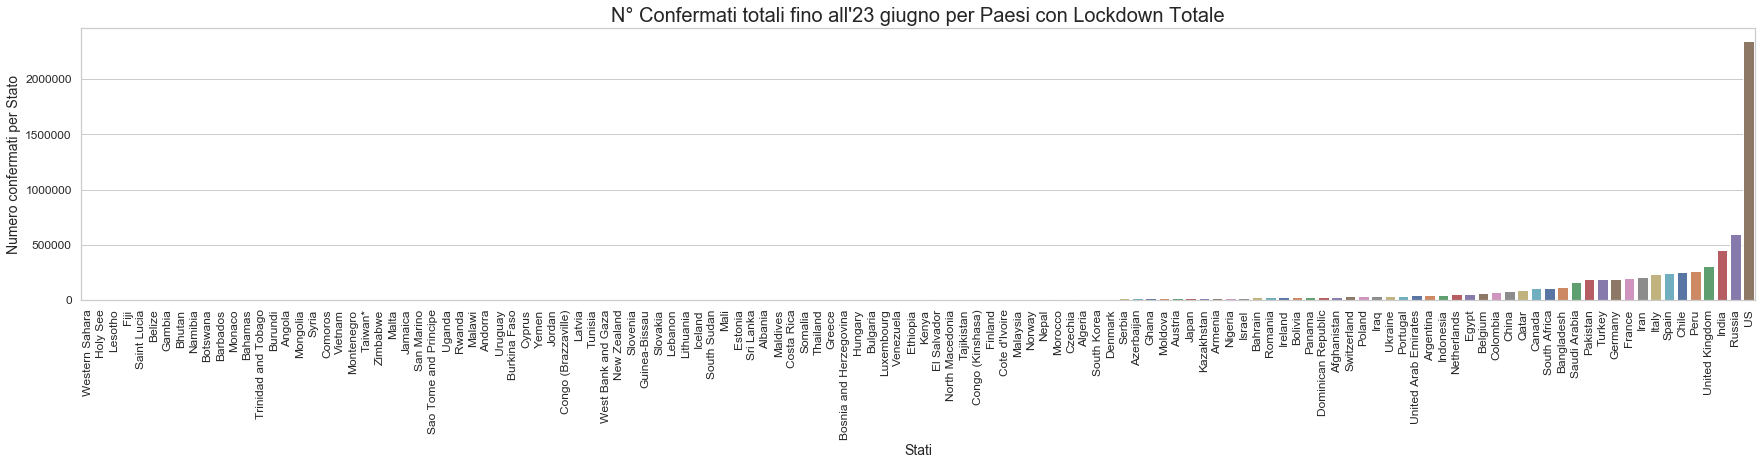

In [15]:
confermati_TOT=np.array(Lockdown_Tot.Confermati)
labels = np.array(Lockdown_Tot.Paese)
plt.figure(figsize=(30,5))
sns.barplot(x=labels,y=confermati_TOT, palette='deep')
plt.ylabel("Numero confermati per Stato")
plt.xlabel("Stati",rotation=0)
plt.title("N° Confermati totali fino all'23 giugno per Paesi con Lockdown Totale",size = 20)
plt.xticks(rotation=90)
# save_fig("N° Confermati totali fino all'23 giugno per Paese con LockDown Totale")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

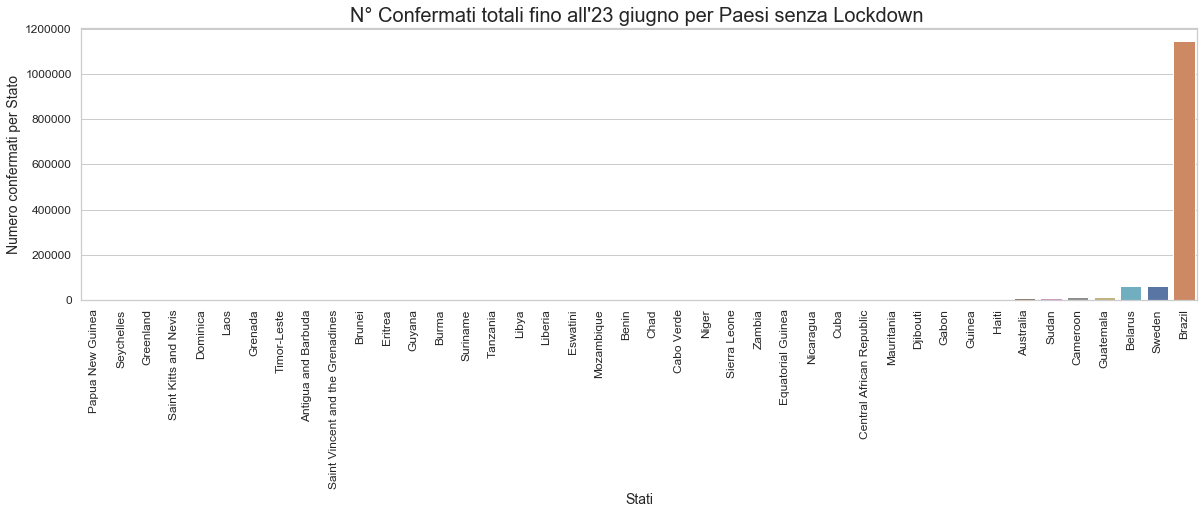

In [16]:
confermati_Nes=np.array(Lockdown_Nes.Confermati)
labels = np.array(Lockdown_Nes.Paese)
plt.figure(figsize=(20,5))
sns.barplot(x=labels,y=confermati_Nes, palette='deep')
plt.ylabel("Numero confermati per Stato")
plt.xlabel("Stati",rotation=0)
plt.title("N° Confermati totali fino all'23 giugno per Paesi senza Lockdown ",size = 20)
plt.xticks(rotation=90)
# save_fig("N° Confermati totali fino all'23 giugno per Paese senza LockDown ")

2347022


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

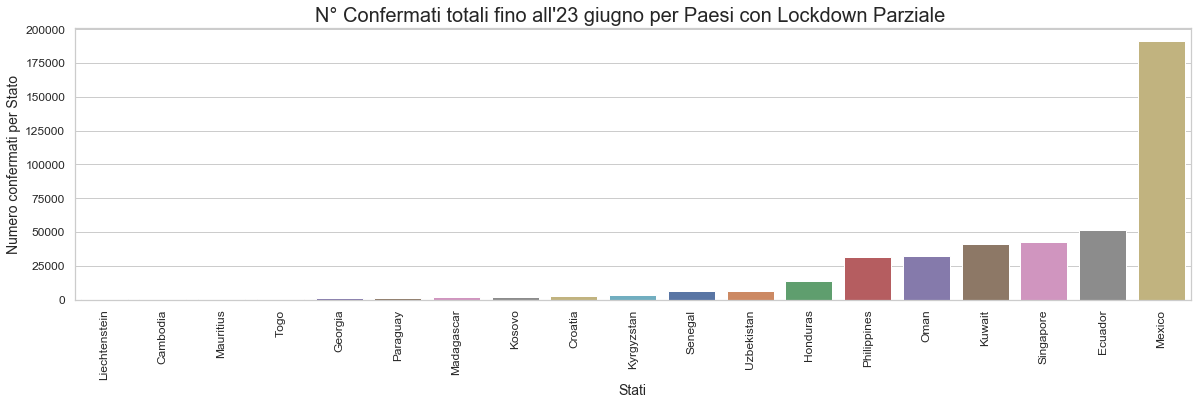

In [17]:
confermati_Parz=np.array(Lockdown_Parz.Confermati)
labels = np.array(Lockdown_Parz.Paese)

print(max(confermati_TOT))
plt.figure(figsize=(20,5))
sns.barplot(x=labels,y=confermati_Parz, palette='deep')
plt.ylabel("Numero confermati per Stato")
plt.xlabel("Stati",rotation=0)
plt.title("N° Confermati totali fino all'23 giugno per Paesi con Lockdown Parziale ",size = 20)
plt.xticks(rotation=90)
# save_fig("N° Confermati totali fino all'23 giugno per Paese con LockDown Parziale")

## Osservazioni
Possiamo notare stranamente che i paesi che hanno adottato il lockdown hanno avuto moltissimi casi.

Tra quelli che non l'hanno adottato vediamo solamente il brasile che ha rilevato troppi casi a causa di questa scelta.

Per i paesi che hanno adattato un livello parziale di Lockdown non si hanno rilevato dati esageramente elevanti dall'inizio della pandemia. 

---
# Ulteriori osservazioni
## Vediamo un grafico che rappresenta la crescita del numero di confermati fino all'8 giugno per ogni Stato

Per questioni di comodità nella visualizzazione della crescita dei dati escludo i paesi che possiedono un numero di confermati al di sotto dei 15 000.


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.]),
 <a list of 6 Text xticklabel objects>)

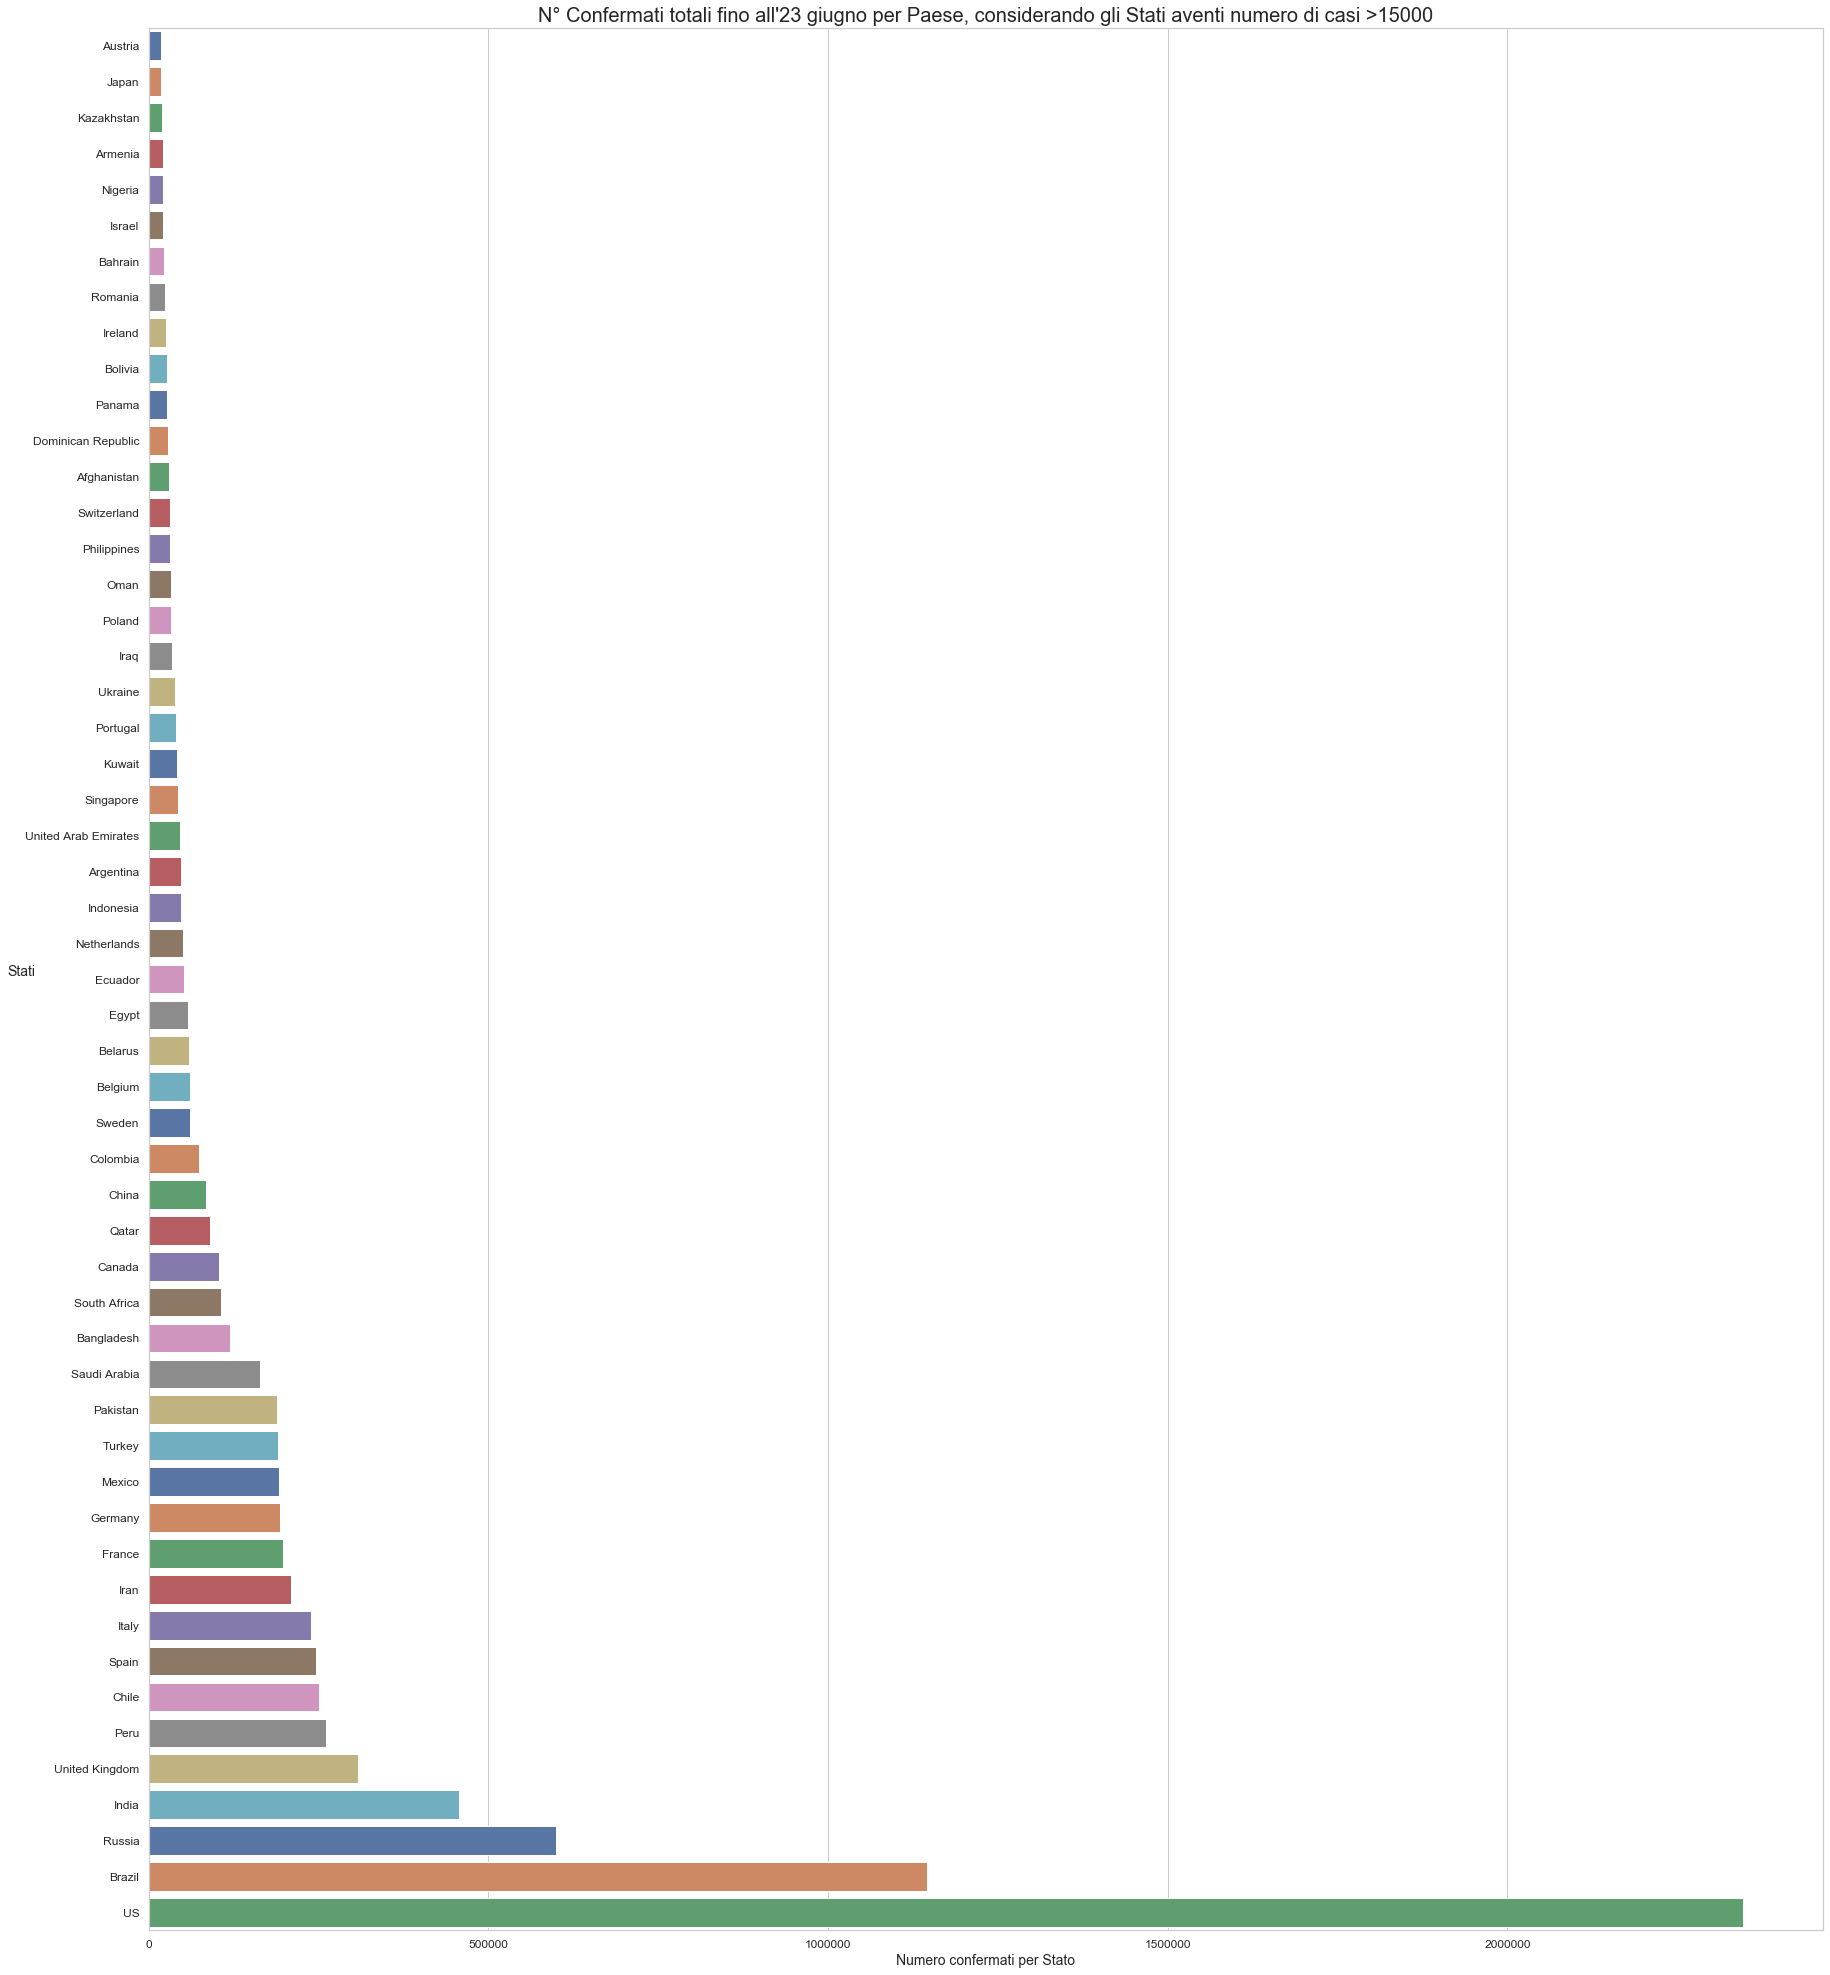

In [18]:
x=ts[datetime(2020, 6, 23):]
x=x.sort_values('Confermati')
confermati_TOT=np.array(x.Confermati)
labels = np.array(x.Paese)

Casi_tot_TOP=ps.Series(confermati_TOT,index=labels)
for i in labels: 
    if Casi_tot_TOP[i]<15000:
        Casi_tot_TOP=Casi_tot_TOP.drop(i)
        
plt.figure(figsize=(30,35))
sns.barplot(x=Casi_tot_TOP.values, y=Casi_tot_TOP.index,palette='deep')
plt.xlabel("Numero confermati per Stato")
plt.ylabel("Stati",rotation=0)
plt.title("N° Confermati totali fino all'23 giugno per Paese, considerando gli Stati aventi numero di casi >15000",size = 20)
plt.xticks(rotation=0)
# save_fig("N° Confermati totali fino all'23 giugno per Paese")

## Ora soffermiamoci sui 10 Paesi che hanno risentito un maggior numero di casi
Prendiamo i 10 paesi e plottiamo il valore dei loro confermati risultati fino ad oggi 23 giugno.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

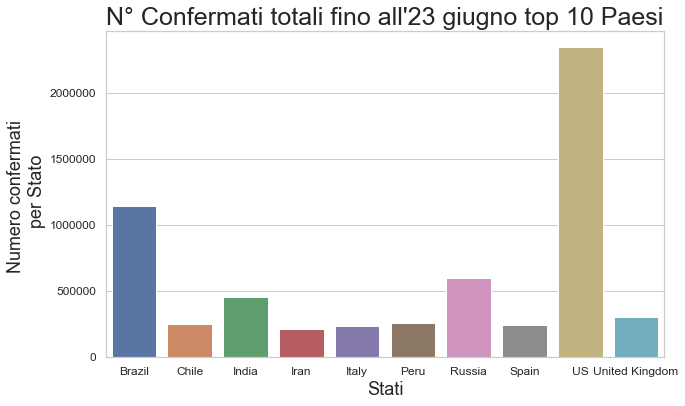

In [19]:
confermati_TOTALI=np.array(ts[datetime(2020, 6, 23):].Confermati)
labels = np.array(ts[datetime(2020, 6, 23):].Paese)
Casi_tot_TOP_10=ps.Series(confermati_TOTALI,index=labels)
for i in labels: 
    if Casi_tot_TOP_10[i]<200000:
        Casi_tot_TOP_10=Casi_tot_TOP_10.drop(i)

plt.figure(figsize=(10,6))
sns.barplot(x=Casi_tot_TOP_10.index, y=Casi_tot_TOP_10.values,palette='deep')
plt.ylabel("Numero confermati \n per Stato",rotation=90,size=18)
plt.xlabel("Stati",rotation=0,size=18)
plt.title("N° Confermati totali fino all'23 giugno top 10 Paesi",size = 25)
plt.xticks(rotation=0)
# save_fig("N° Confermati totali fino all'23 giugno top 10 Paesi")

---
# Iniziamo a preparare i Dati che ulizzeremo in seguito per definire la nostra x e la nostra y da poter passare agli algoritmi di Addestramento 


## Andiamo a creare un dataFrame tenendo conto dei Nuovi casi per ogni paese nella lista Dei Top10,
## nel periodo che va dal 22 gennaio all'23 giugno dell'anno 2020

Effettuamo una divisione del Dataset prendendo attraverso i metodi sotto esposti, i nuovi casi per ognuno dei paesi contenuti all'interno della lista dei TOP_10, 

e per concludere definiamo un DataFrame che avrà 10 colonne ognuna delle quali rappresenterà i nuovi casi per il 1°.2°,3°,....,10° paese in tale lista.

In [20]:
NewDati={"Top 10 Stati": ts['Paese'],
        "Nuovi casi":ts['Nuovi casi']}
Nuovi_Casi_Andamento_TOT=ps.DataFrame(NewDati,index=ts.index)
m=0
LISTA= np.array(Nuovi_Casi_Andamento_TOT['Top 10 Stati'])
L=Casi_tot_TOP_10.index
for i in LISTA:
    if i!=L[0] and i!=L[1] and i!=L[2] and i!=L[3] and i!=L[4] and i!=L[5] and i!=L[6] and i!=L[7] and i!=L[8] and i!=L[9]:
        Nuovi_Casi_Andamento_TOT.iloc[m] = np.nan
    m=m+1
Nuovi_Casi_Andamento_TOT=Nuovi_Casi_Andamento_TOT.dropna()


In [21]:
def f(x,I):
    LISTA= np.array(x['Top 10 Stati'])
    m=0
    for i in LISTA:
        if i!=I :
            x.iloc[m] = np.nan
        m=m+1
    return x
    
Brasile=f(Nuovi_Casi_Andamento_TOT.copy(),'Brazil').dropna()
Chile=f(Nuovi_Casi_Andamento_TOT.copy(),'Chile').dropna()
India=f(Nuovi_Casi_Andamento_TOT.copy(),'India').dropna()
Iran=f(Nuovi_Casi_Andamento_TOT.copy(),'Iran').dropna()
Italia=f(Nuovi_Casi_Andamento_TOT.copy(),'Italy').dropna()
Perù=f(Nuovi_Casi_Andamento_TOT.copy(),'Peru').dropna()
Russia=f(Nuovi_Casi_Andamento_TOT.copy(),'Russia').dropna()
Spagna=f(Nuovi_Casi_Andamento_TOT.copy(),'Spain').dropna()
USA=f(Nuovi_Casi_Andamento_TOT.copy(),'US').dropna()
Regno_Unito=f(Nuovi_Casi_Andamento_TOT.copy(),'United Kingdom').dropna()
CompletaDati={"NuoviCasi Brasile":Brasile['Nuovi casi'],
             "NuoviCasi Chile":Chile['Nuovi casi'],
             "NuoviCasi India":India['Nuovi casi'],
             "NuoviCasi Iran":Iran['Nuovi casi'],
             "NuoviCasi Italia":Italia['Nuovi casi'],
             "NuoviCasi Perù":Perù['Nuovi casi'],
             "NuoviCasi Russia":Russia['Nuovi casi'],
             "NuoviCasi Spagna":Spagna['Nuovi casi'],
             "NuoviCasi USA":USA['Nuovi casi'],
             "NuoviCasi Regno_Unito":Regno_Unito['Nuovi casi']}
COMPLETO=ps.DataFrame(CompletaDati,index=Italia.index)

In [22]:
COMPLETO

NuoviCasi Brasile  NuoviCasi Chile  NuoviCasi India  \
2020-01-22                0.0              0.0              0.0   
2020-01-23                0.0              0.0              0.0   
2020-01-24                0.0              0.0              0.0   
2020-01-25                0.0              0.0              0.0   
2020-01-26                0.0              0.0              0.0   
...                       ...              ...              ...   
2020-06-19            54771.0           6290.0          14516.0   
2020-06-20            34666.0           5355.0          15403.0   
2020-06-21            15762.0           5607.0          14831.0   
2020-06-22            23129.0           4608.0          14933.0   
2020-06-23            39436.0           3804.0          15968.0   

            NuoviCasi Iran  NuoviCasi Italia  NuoviCasi Perù  \
2020-01-22             0.0               0.0             0.0   
2020-01-23             0.0               0.0             0.0   
2020-01-24             0.0               0.0             0.0   
2020-01-25             0.0               0.0             0.0   
2020-01-26             0.0               0.0             0.0   
...                    ...               ...             ...   
2020-06-19          2615.0               0.0          3537.0   
2020-06-20          2322.0             264.0          3413.0   
2020-06-21          2368.0             224.0          3598.0   
2020-06-22          2573.0             221.0          2511.0   
2020-06-23          2445.0             113.0          3363.0   

            NuoviCasi Russia  NuoviCasi Spagna  NuoviCasi USA  \
2020-01-22               0.0               0.0            0.0   
2020-01-23               0.0               0.0            0.0   
2020-01-24               0.0               0.0            1.0   
2020-01-25               0.0               0.0            0.0   
2020-01-26               0.0               0.0            3.0   
...                      ...               ...            ...   
2020-06-19            7971.0             307.0        31527.0   
2020-06-20            7870.0             363.0        32540.0   
2020-06-21            7717.0             334.0        26171.0   
2020-06-22            7586.0             232.0        31012.0   
2020-06-23            7413.0             248.0        34720.0   

            NuoviCasi Regno_Unito  
2020-01-22                    0.0  
2020-01-23                    0.0  
2020-01-24                    0.0  
2020-01-25                    0.0  
2020-01-26                    0.0  
...                           ...  
2020-06-19                 1350.0  
2020-06-20                 1295.0  
2020-06-21                 1223.0  
2020-06-22                  958.0  
2020-06-23                  921.0  

[154 rows x 10 columns]

### ORA PLOTTIAMO I SEGUENTI DATI OTTENUTI E INSERITI NEL DATAFRAME COMPLETO
Visualizziamo meglio i dati attraverso il seguente grafico.

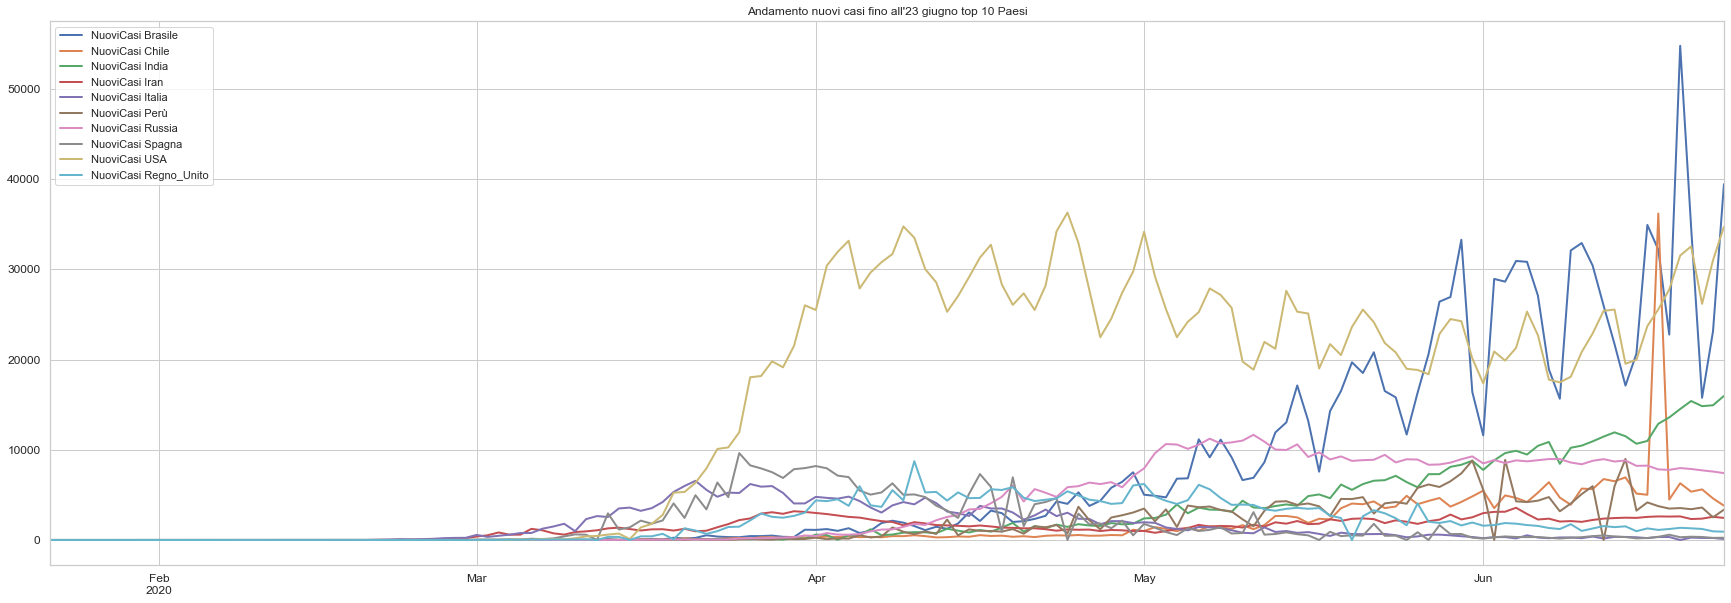

In [23]:
#Brasile,Chile,India,Iran,Italia,Perù,Russia,Spagna,USA,Regno_Unito
COMPLETO['2020'].plot(figsize=(30,10),title="Andamento nuovi casi fino all'23 giugno top 10 Paesi",linewidth=2, markersize=20)
# save_fig("Andamento nuovi casi fino all'23 giugno top 10 Paesi")

### vediamo nel particolare l' andamento di ogni singolo paese nel periodo dal 22 gennaio all'23 giugno

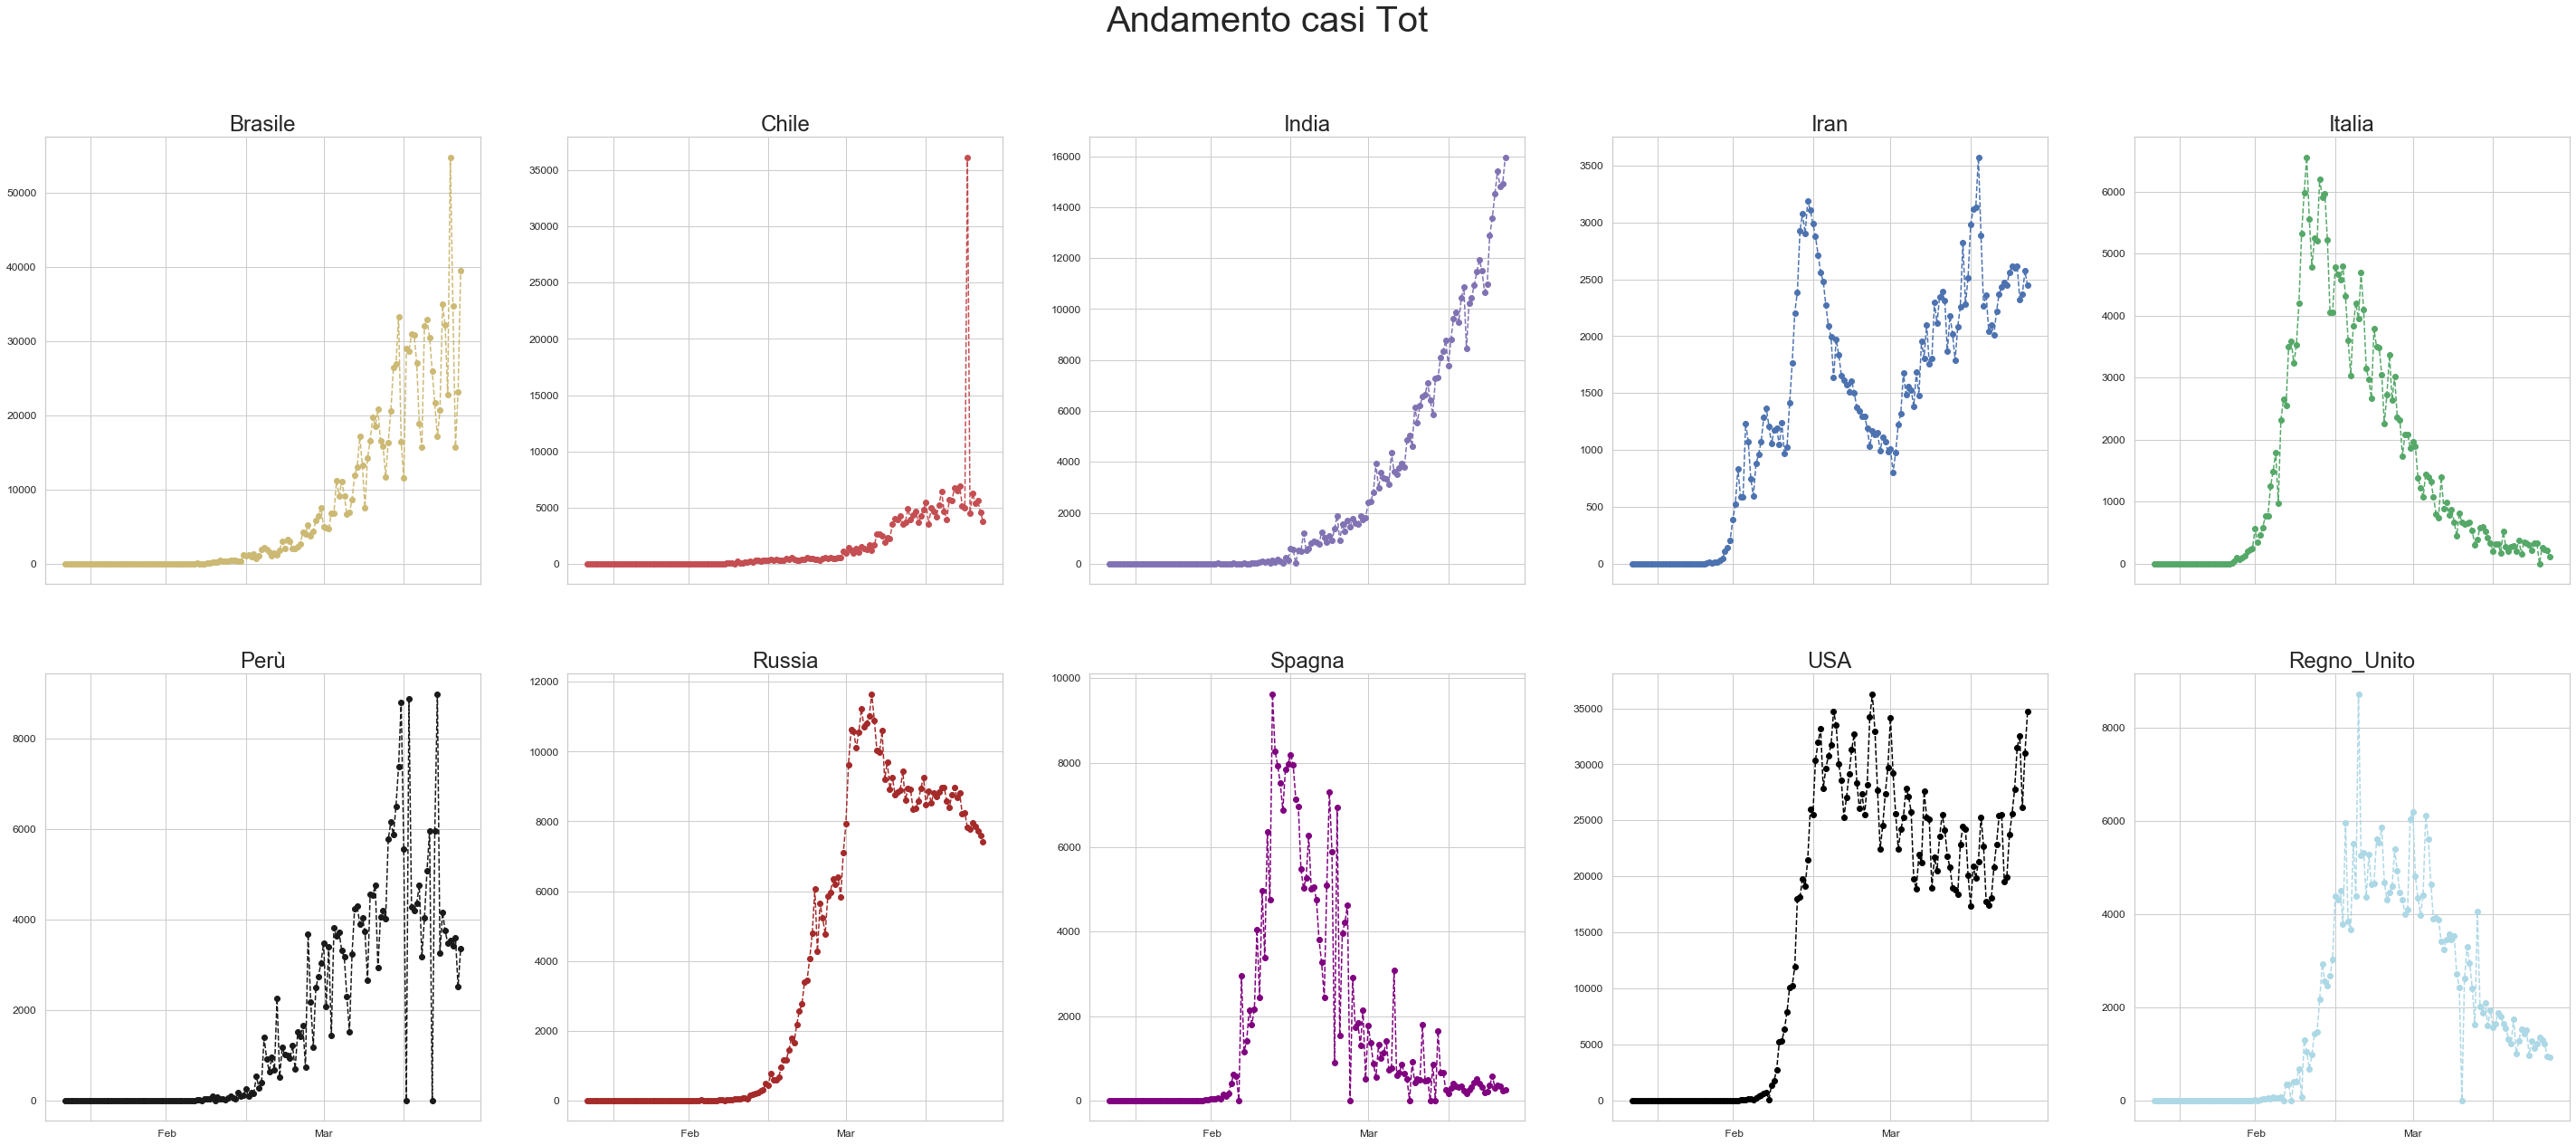

In [24]:
fig, axes = plt.subplots(2,5,sharex=True)
fig.set_size_inches(50,20)
for i in range (2):
    for j in range (5):
        axes[i,j].set_xticklabels([""," Feb","","Mar","","Apr","","Mag","","Giu"], rotation = 0)
fig.suptitle("Andamento casi Tot",fontsize=40)
axes[0,0].set_title("Brasile", fontsize=24)
axes[0,0].plot(COMPLETO['2020']['NuoviCasi Brasile'],'ko--',color='y')
axes[0,1].set_title("Chile", fontsize=24)
axes[0,1].plot(COMPLETO['2020']['NuoviCasi Chile'],'ko--',color='r')
axes[0,2].set_title("India", fontsize=24)
axes[0,2].plot(COMPLETO['2020']['NuoviCasi India'],'ko--',color='m')
axes[0,3].set_title("Iran", fontsize=24)
axes[0,3].plot(COMPLETO['2020']['NuoviCasi Iran'],'ko--',color='b')
axes[0,4].set_title("Italia", fontsize=24)
axes[0,4].plot(COMPLETO['2020']['NuoviCasi Italia'],'ko--',color='g')
axes[1,0].set_title("Perù", fontsize=24)
axes[1,0].plot(COMPLETO['2020']['NuoviCasi Perù'],'ko--',color='k')
axes[1,1].set_title("Russia", fontsize=24)
axes[1,1].plot(COMPLETO['2020']['NuoviCasi Russia'],'ko--',color='brown')
axes[1,2].set_title("Spagna", fontsize=24)
axes[1,2].plot(COMPLETO['2020']['NuoviCasi Spagna'],'ko--',color='purple')
axes[1,3].set_title("USA", fontsize=24)
axes[1,3].plot(COMPLETO['2020']['NuoviCasi USA'],'ko--',color='black')
axes[1,4].set_title("Regno_Unito", fontsize=24)
axes[1,4].plot(COMPLETO['2020']['NuoviCasi Regno_Unito'],'ko--',color='lightblue')
# save_fig("Andamento nuovi casi fino all'23 giugno top 10 Paesi singoli")

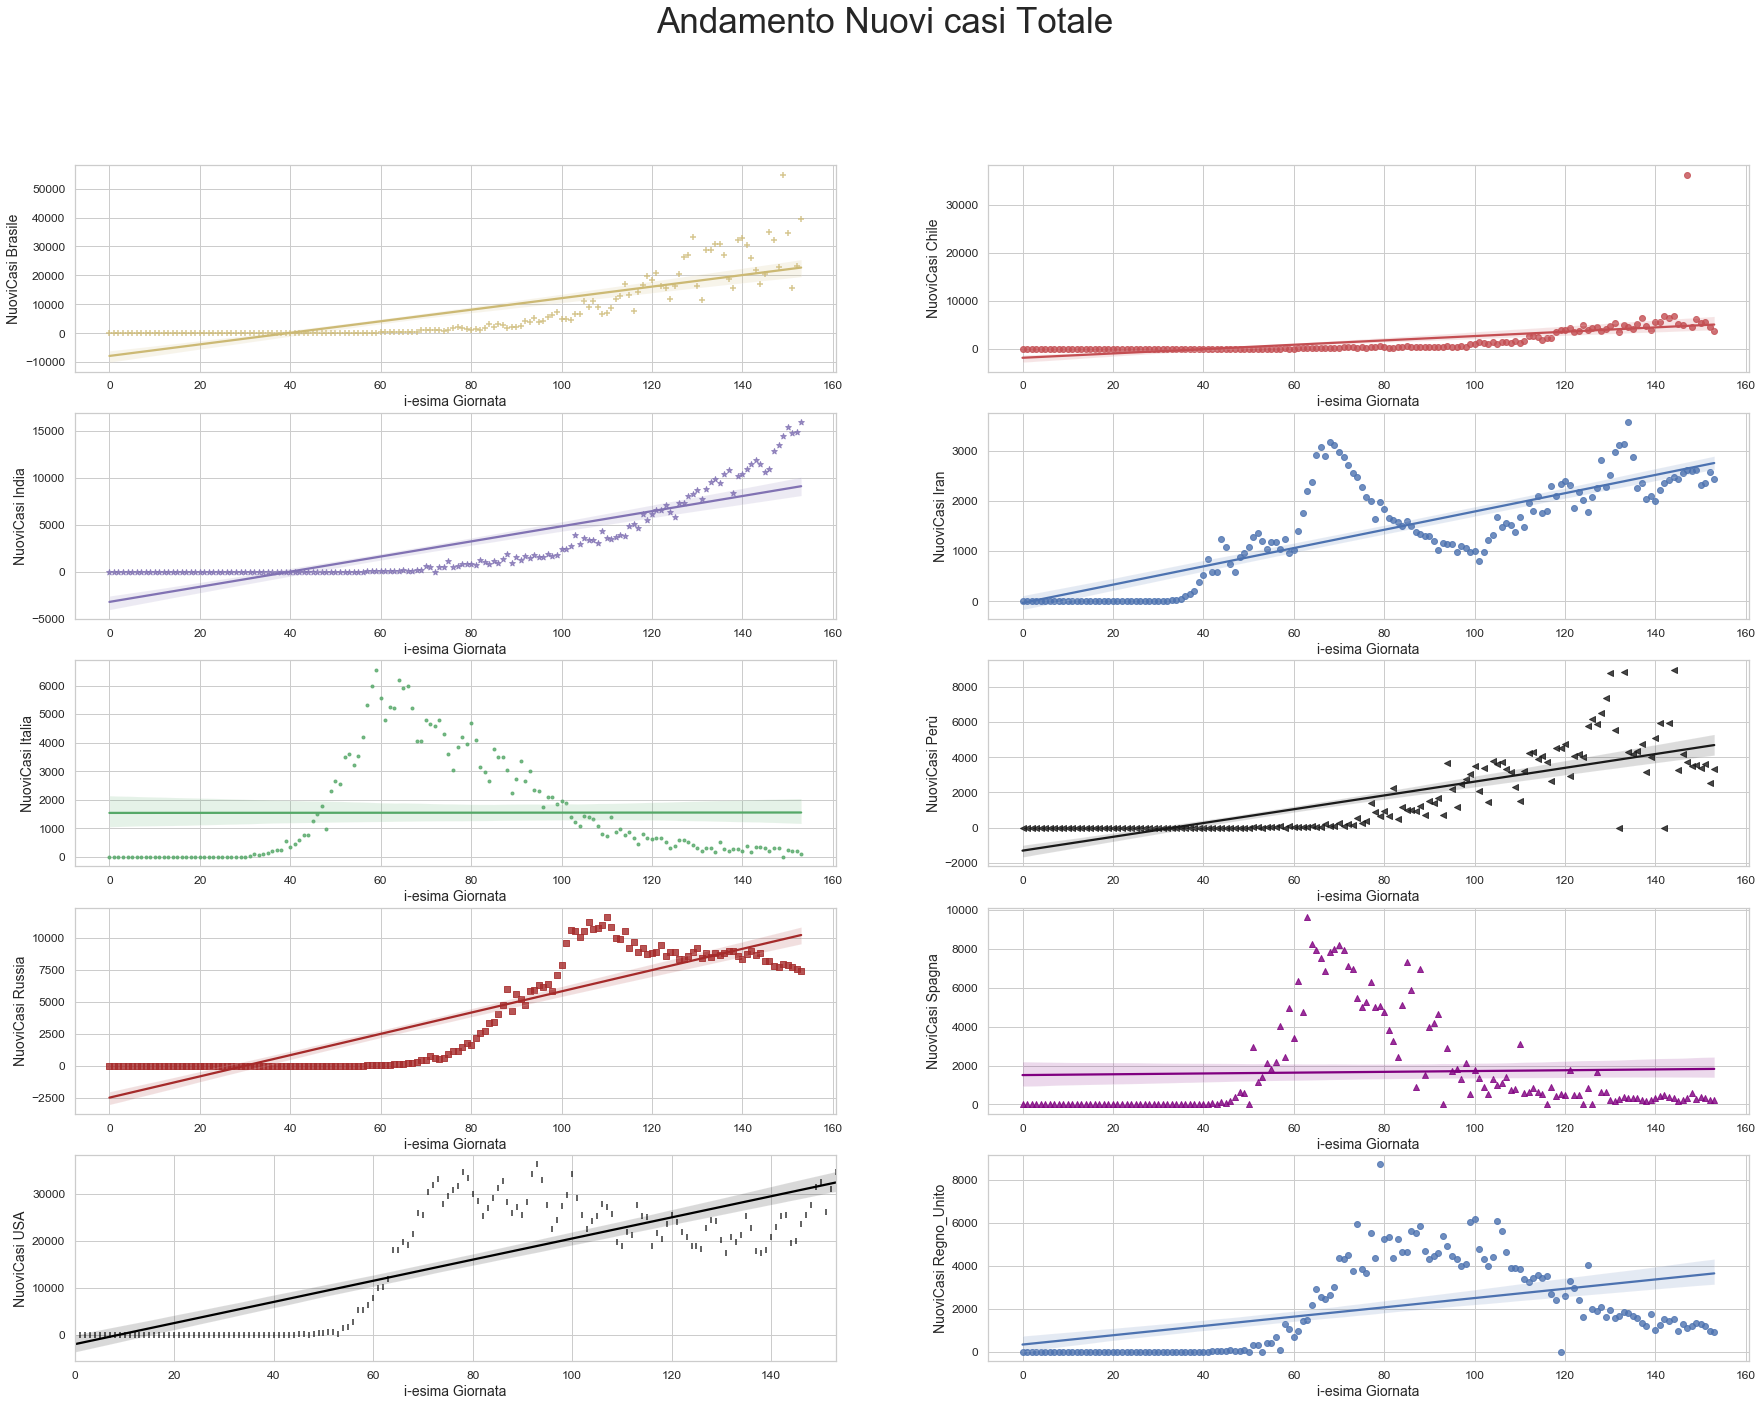

In [25]:
O=COMPLETO.reset_index()

fig, ((ax1, ax2),(ax3,ax4),(ax5, ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2)
fig.set_size_inches(30, 22)

fig.suptitle("Andamento Nuovi casi Totale",fontsize=35)
x1, y1 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Brasile'], name="NuoviCasi Brasile")
sns.regplot(x=x1, y=y1, marker="+",ax=ax1,color='y')
x2, y2 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Chile'], name="NuoviCasi Chile")
sns.regplot(x=x2, y=y2,ax=ax2,color='r')
x3, y3 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi India'], name="NuoviCasi India")
sns.regplot(x=x3, y=y3, marker="*",ax=ax3,color='m')
x4, y4 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Iran'], name="NuoviCasi Iran")
sns.regplot(x=x4, y=y4,ax=ax4,color='b')
x5, y5 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Italia'], name="NuoviCasi Italia")
sns.regplot(x=x5, y=y5, marker=".",ax=ax5,color='g')
x6, y6 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Perù'], name="NuoviCasi Perù")
sns.regplot(x=x6, y=y6, marker="<",ax=ax6,color='k')
x7, y7 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Russia'], name="NuoviCasi Russia")
sns.regplot(x=x7, y=y7, marker=",",ax=ax7,color='brown')
x8, y8 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Spagna'], name="NuoviCasi Spagna")
sns.regplot(x=x8, y=y8, marker="^",ax=ax8,color='purple')
x9, y9 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi USA'], name="NuoviCasi USA")
sns.regplot(x=x9, y=y9, marker="|",ax=ax9,color='black')
x10, y10 = ps.Series(O.index, name="i-esima Giornata"), ps.Series(O['NuoviCasi Regno_Unito'], name="NuoviCasi Regno_Unito")
sns.regplot(x=x10, y=y10,ax=ax10)
# save_fig("Andamento nuovi casi fino all'23 giugno top 10 Paesi singoli regplot")


### Notiamo che nel mese di maggio, l'andamento per i 10 paesi ha raggiunto il picco massimo.

In più è possibile notare come l'andamento dei paesi nella maggior parte dei casi ha seguito una distribuzione normale o di Gaus, 

anche se possiamo notare alcuni punti di outlier in alcuni paesi che raffigurano un rumore che può portare a definire cattive predizioni. 


---
# Matrice di correlazione tra i Nuovi Casi dei vari paesi 
Attraverso la matrice di correlazione vediamo come sono correlate le varie nazioni andando a vedere il numero di nuovi casi positivi al virus giornaliero.

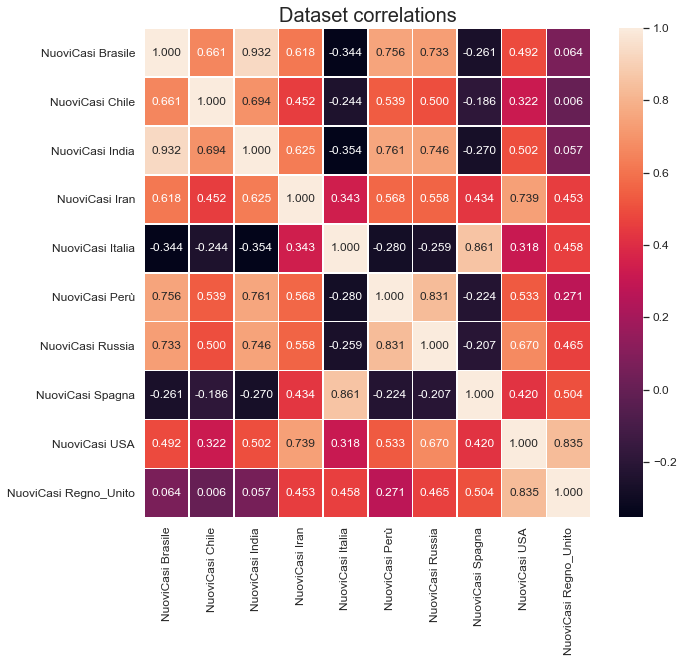

In [26]:
fig,ax = plt.subplots(figsize=(10,9))
fig = sns.heatmap(COMPLETO.corr(), annot=True,linewidths=.5,fmt='.3f')
plt.title("Dataset correlations", size=20)
plt.show()
figure = fig.get_figure()
# save_fig("Dataset correlations 1")

Vediamo che per esempio:

    - l'italia ha una forte correlazione con Spagna.

    - Il Regno Unito con gli USA 

    - Brasile con l'India 




# Costruzione del Training Set
Prendiamo come data Iniziale sulla quale fare la predizione il 22-01-2020.

Da qui andiamo a definire un delta che sarà utile per costruire DELTA_i DataFrame che avranno al loro interno il numero di Casi a x + DELTA[i] giorni

## Ora creo questi 8 DataFrame, relativi alle date per ogni paese a distanza di Delta(i) giorni. 
Ogni Paese per ogni giorno avrà nella colonna yi il corrispettivo valore dei nuovi casi dopo Delta(i) giorni. 

Sfrutto le proprietà Derivate dalle TimeSeries per prendere intervalli di date. 

In [27]:
from datetime import timedelta
Delta=[1,2,3,4,5,6,7,8]

Y_1giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[0])):(datetime(2020, 6, 15)+timedelta(Delta[0]))].copy()
Y_2giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[1])):(datetime(2020, 6, 15)+timedelta(Delta[1]))].copy()
Y_3giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[2])):(datetime(2020, 6, 15)+timedelta(Delta[2]))].copy()
Y_4giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[3])):(datetime(2020, 6, 15)+timedelta(Delta[3]))].copy()
Y_5giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[4])):(datetime(2020, 6, 15)+timedelta(Delta[4]))].copy()
Y_6giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[5])):(datetime(2020, 6, 15)+timedelta(Delta[5]))].copy()
Y_7giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[6])):(datetime(2020, 6, 15)+timedelta(Delta[6]))].copy()
Y_8giorni_da_X=COMPLETO[(datetime(2020, 1, 22)+timedelta(Delta[7])):(datetime(2020, 6, 15)+timedelta(Delta[7]))].copy()

In [28]:
Y_8giorni_da_X

NuoviCasi Brasile  NuoviCasi Chile  NuoviCasi India  \
2020-01-30                0.0              0.0              1.0   
2020-01-31                0.0              0.0              0.0   
2020-02-01                0.0              0.0              0.0   
2020-02-02                0.0              0.0              1.0   
2020-02-03                0.0              0.0              1.0   
...                       ...              ...              ...   
2020-06-19            54771.0           6290.0          14516.0   
2020-06-20            34666.0           5355.0          15403.0   
2020-06-21            15762.0           5607.0          14831.0   
2020-06-22            23129.0           4608.0          14933.0   
2020-06-23            39436.0           3804.0          15968.0   

            NuoviCasi Iran  NuoviCasi Italia  NuoviCasi Perù  \
2020-01-30             0.0               0.0             0.0   
2020-01-31             0.0               2.0             0.0   
2020-02-01             0.0               0.0             0.0   
2020-02-02             0.0               0.0             0.0   
2020-02-03             0.0               0.0             0.0   
...                    ...               ...             ...   
2020-06-19          2615.0               0.0          3537.0   
2020-06-20          2322.0             264.0          3413.0   
2020-06-21          2368.0             224.0          3598.0   
2020-06-22          2573.0             221.0          2511.0   
2020-06-23          2445.0             113.0          3363.0   

            NuoviCasi Russia  NuoviCasi Spagna  NuoviCasi USA  \
2020-01-30               0.0               0.0            0.0   
2020-01-31               2.0               0.0            2.0   
2020-02-01               0.0               1.0            1.0   
2020-02-02               0.0               0.0            0.0   
2020-02-03               0.0               0.0            3.0   
...                      ...               ...            ...   
2020-06-19            7971.0             307.0        31527.0   
2020-06-20            7870.0             363.0        32540.0   
2020-06-21            7717.0             334.0        26171.0   
2020-06-22            7586.0             232.0        31012.0   
2020-06-23            7413.0             248.0        34720.0   

            NuoviCasi Regno_Unito  
2020-01-30                    0.0  
2020-01-31                    2.0  
2020-02-01                    0.0  
2020-02-02                    0.0  
2020-02-03                    0.0  
...                           ...  
2020-06-19                 1350.0  
2020-06-20                 1295.0  
2020-06-21                 1223.0  
2020-06-22                  958.0  
2020-06-23                  921.0  

[146 rows x 10 columns]

## Vediamo due grafici che raffigurano l'andamento dei nuovi casi dato giorno x e dato giorno x+3

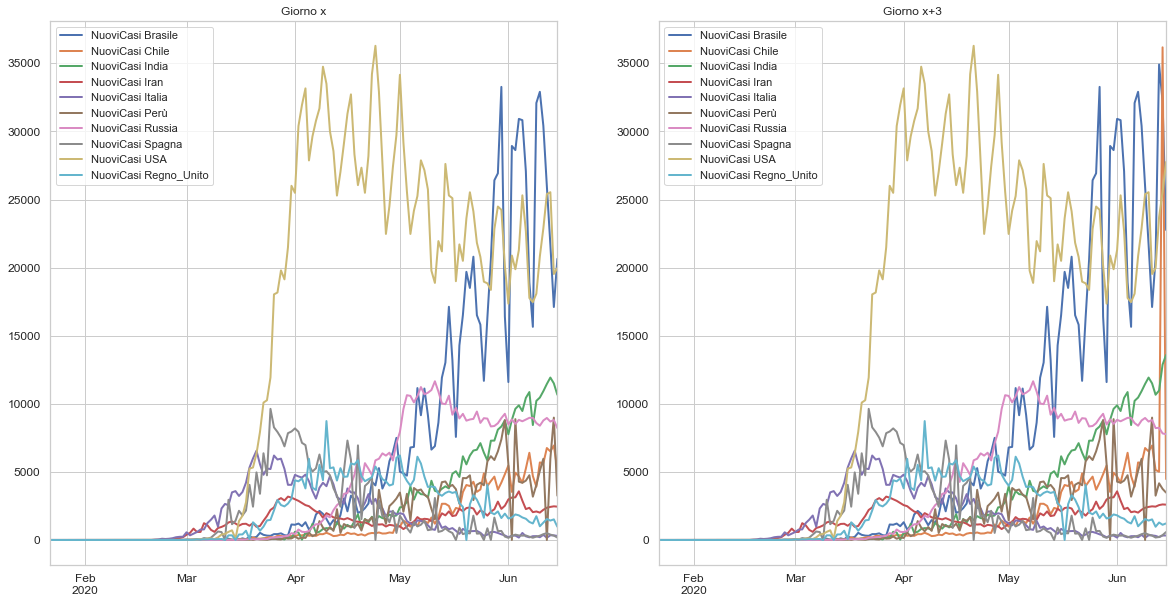

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1,2, sharex=True)
fig.set_size_inches(20,10)
COMPLETO[:datetime(2020, 6, 15)].sort_index().plot(title="Giorno x",linewidth=2, markersize=20,ax=ax1)
NY_3giorni_da_X=Y_3giorni_da_X.copy()
NY_3giorni_da_X.index=COMPLETO[:(datetime(2020, 6, 15))].index
NY_3giorni_da_X.sort_index().plot(title="Giorno x+3",linewidth=2, markersize=20,ax=ax2)
# save_fig("Andamento giorno x e giorno x+3")

## Crea un train test e un set di test per X e Y
L'idea di lasciare che i dati guidino l'intero processo è allettante, tuttavia questo approccio può essere controproducente.

Per questo motivo, teniamo una parte dei dati che il nostro algoritmo non ha mai visto prima. Prima di fare ciò mi ridefifinisco i Dataframe in modo tale che alla fine avrò 10 Datateset:
    
    -Ognuno di Questi DataFrame sarà indicativo di uno Stato nella Lista dei TOP_10
    -Ogni Dataframe avrà 9 colonne , dove ogni riga sarà formata da:
           -Valore giorno x,
           -Valore giorno (x+1)-valore giorno (x)
           -Valore giorno (x+2)-valore giorno (x)
           -Valore giorno (x+3)-valore giorno (x)
           -Valore giorno (x+4)-valore giorno (x)
           -Valore giorno (x+5)-valore giorno (x)
           -Valore giorno (x+6)-valore giorno (x)
           -Valore giorno (x+7)-valore giorno (x)
           -Valore giorno (x+8)-valore giorno (x)

In [30]:
D1=COMPLETO[:datetime(2020, 6, 15)].copy()
Y1=Y_1giorni_da_X.copy()
Y2=Y_2giorni_da_X.copy()
Y3=Y_3giorni_da_X.copy()
Y4=Y_4giorni_da_X.copy()
Y5=Y_5giorni_da_X.copy()
Y6=Y_6giorni_da_X.copy()
Y7=Y_7giorni_da_X.copy()
Y8=Y_8giorni_da_X.copy()

Stati=Y_1giorni_da_X.columns
def CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,i):
    indice=D1.index
    dx=np.array(D1[Stati[i]]).copy()
    Dati={Stati[i]:D1[Stati[i]],
         'Aumento CasiGiorno x+1':np.array(Y1[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+2':np.array(Y2[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+3':np.array(Y3[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+4':np.array(Y4[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+5':np.array(Y5[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+6':np.array(Y6[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+7':np.array(Y7[Stati[i]]).copy()-dx,
         'Aumento CasiGiorno x+8':np.array(Y8[Stati[i]]).copy()-dx}
    Res=ps.DataFrame(Dati,index=indice)
    return Res
Brasile_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,0)    
Chile_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,1)
India_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,2)
Iran_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,3)
Italia_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,4)    
Perù_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,5)
Russia_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,6)
Spagna_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,7)
USA_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,8)    
Regno_Unito_Pred=CreaD(D1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,9)
Lista_Stati_Pred=[Brasile_Pred,Chile_Pred,India_Pred,Iran_Pred,Italia_Pred,Perù_Pred,Russia_Pred,Spagna_Pred,USA_Pred,Regno_Unito_Pred]
Lista_Stati_Pred[4][datetime(2020, 3, 20):datetime(2020, 3, 30)]

NuoviCasi Italia  Aumento CasiGiorno x+1  Aumento CasiGiorno x+2  \
2020-03-20            5986.0                   571.0                  -426.0   
2020-03-21            6557.0                  -997.0                 -1768.0   
2020-03-22            5560.0                  -771.0                  -311.0   
2020-03-23            4789.0                   460.0                   421.0   
2020-03-24            5249.0                   -39.0                   954.0   
2020-03-25            5210.0                   993.0                   699.0   
2020-03-26            6203.0                  -294.0                  -229.0   
2020-03-27            5909.0                    65.0                  -692.0   
2020-03-28            5974.0                  -757.0                 -1924.0   
2020-03-29            5217.0                 -1167.0                 -1164.0   
2020-03-30            4050.0                     3.0                   732.0   

            Aumento CasiGiorno x+3  Aumento CasiGiorno x+4  \
2020-03-20                 -1197.0                  -737.0   
2020-03-21                 -1308.0                 -1347.0   
2020-03-22                  -350.0                   643.0   
2020-03-23                  1414.0                  1120.0   
2020-03-24                   660.0                   725.0   
2020-03-25                   764.0                     7.0   
2020-03-26                  -986.0                 -2153.0   
2020-03-27                 -1859.0                 -1856.0   
2020-03-28                 -1921.0                 -1192.0   
2020-03-29                  -435.0                  -549.0   
2020-03-30                   618.0                   535.0   

            Aumento CasiGiorno x+5  Aumento CasiGiorno x+6  \
2020-03-20                  -776.0                   217.0   
2020-03-21                  -354.0                  -648.0   
2020-03-22                   349.0                   414.0   
2020-03-23                  1185.0                   428.0   
2020-03-24                   -32.0                 -1199.0   
2020-03-25                 -1160.0                 -1157.0   
2020-03-26                 -2150.0                 -1421.0   
2020-03-27                 -1127.0                 -1241.0   
2020-03-28                 -1306.0                 -1389.0   
2020-03-29                  -632.0                  -412.0   
2020-03-30                   755.0                   266.0   

            Aumento CasiGiorno x+7  Aumento CasiGiorno x+8  
2020-03-20                   -77.0                   -12.0  
2020-03-21                  -583.0                 -1340.0  
2020-03-22                  -343.0                 -1510.0  
2020-03-23                  -739.0                  -736.0  
2020-03-24                 -1196.0                  -467.0  
2020-03-25                  -428.0                  -542.0  
2020-03-26                 -1535.0                 -1618.0  
2020-03-27                 -1324.0                 -1104.0  
2020-03-28                 -1169.0                 -1658.0  
2020-03-29                  -901.0                 -1618.0  
2020-03-30                  -451.0                 -1011.0

#### Prima di operare normalizziamo i nostri dati.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def Normalize (Lista,p):
    for i in Lista:
        x = i.values #returns a numpy array
        x_scaled = p.fit_transform(x)
        i = ps.DataFrame(x_scaled)
        
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
Normalize(Lista_Stati_Pred,num_pipeline)
Normalize([Y_1giorni_da_X,Y_2giorni_da_X,Y_3giorni_da_X,Y_4giorni_da_X,Y_5giorni_da_X,Y_6giorni_da_X,Y_7giorni_da_X,Y_8giorni_da_X],num_pipeline)

#### Ora finamente possiamo definire i train_set e test_set su cui operare in seguito.

In [32]:
from sklearn.model_selection import train_test_split

train_set_X1, test_set_X1,train_set_X2, test_set_X2,train_set_X3, test_set_X3,train_set_X4, test_set_X4,train_set_X5, test_set_X5,train_set_X6, test_set_X6,train_set_X7, test_set_X7,train_set_X8, test_set_X8,train_set_X9, test_set_X9,train_set_X10, test_set_X10,train_set_Y1, test_set_Y1,train_set_Y2,test_set_Y2,train_set_Y3, test_set_Y3,train_set_Y4,test_set_Y4,train_set_Y5, test_set_Y5,train_set_Y6, test_set_Y6,train_set_Y7, test_set_Y7,train_set_Y8, test_set_Y8= train_test_split(Lista_Stati_Pred[0],Lista_Stati_Pred[1],Lista_Stati_Pred[2],Lista_Stati_Pred[3],Lista_Stati_Pred[4],Lista_Stati_Pred[5],Lista_Stati_Pred[6],Lista_Stati_Pred[7],Lista_Stati_Pred[8],Lista_Stati_Pred[9],Y_1giorni_da_X,Y_2giorni_da_X,Y_3giorni_da_X,Y_4giorni_da_X,Y_5giorni_da_X,Y_6giorni_da_X,Y_7giorni_da_X,Y_8giorni_da_X,test_size=0.3)

lista_Train=[train_set_X1,train_set_X2,train_set_X3,train_set_X4,train_set_X5,train_set_X6,train_set_X7,train_set_X8,train_set_X9, train_set_X10]
lista_TrainY=[train_set_Y1,train_set_Y2,train_set_Y3,train_set_Y4,train_set_Y5,train_set_Y6,train_set_Y7,train_set_Y8]
lista_Test=[test_set_X1,test_set_X2,test_set_X3,test_set_X4,test_set_X5,test_set_X6,test_set_X7,test_set_X8,test_set_X9,test_set_X10]
lista_TestY=[test_set_Y1,test_set_Y2,test_set_Y3,test_set_Y4,test_set_Y5,test_set_Y6,test_set_Y7,test_set_Y8]

print(len(train_set_X1), "train +", len(test_set_X1), "test")

102 train + 44 test


---
# Algoritmi di Regressione


In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import*

def compute_performance(classifiers,names,X,y):
    score_dict = {}
    score_dict['Classifier'] = {}
    score_dict['mse'] = {}
    score_dict['variance']= {}
    score_dict['mae']= {}
    score_dict['median_se']= {}
    score_dict['r2']= {}
    k=0
    for i in range(len(classifiers)):
        value_predictions = classifiers[i].predict(X[k])
        mse=0
        variance=0
        mae=0
        median_se=0
        r2=0
        for yi in y:
            stat=yi.columns
            mse =mse+ mean_squared_error(yi[stat[k]], value_predictions)
            variance =variance+ explained_variance_score(yi[stat[k]],value_predictions)
            mae =mae+ mean_absolute_error(yi[stat[k]],value_predictions)
            median_se =median_se+ median_absolute_error(yi[stat[k]], value_predictions)
            r2 =r2+ r2_score(yi[stat[k]], value_predictions)
        mse=mse/stat.size
        variance=variance/stat.size
        mae=mae/stat.size
        median_se=median_se/stat.size
        r2=r2/stat.size
        name = names[i]
        score_dict['Classifier'][i] = name
        score_dict['mse'][i] = mse
        score_dict['variance'][i] = variance
        score_dict['mae'][i] = mae
        score_dict['median_se'][i] = median_se
        score_dict['r2'][i] = r2
        k=k+1
        
        if k==10:
            k=0
    return score_dict

### Definisco il metodo Addestra
Particolare metodo che richiamo durante la fase di addestramento, in modo tale che per ogni collonna del train_set, che corrisponde al numero di casi per un dato paese, venga addestrato sulla colonna rispettava ad ognuno dei Dataset derivati da DELTA:

In [34]:
regressor= []
names=[]
Stati=Y_1giorni_da_X.columns
Nstati=['Brasile','Chile','India','Iran','Italia','Perù','Russia','Spagna','USA','Regno_Unito']
def addestra(reg,xi,i):
    Col=xi.columns
    stat=Stati[i]
    reg.fit(xi.loc[:, Col[0]:Col[1]], train_set_Y1[stat])
    reg.fit(xi.loc[:, Col[0]:Col[2]], train_set_Y2[stat])
    reg.fit(xi.loc[:, Col[0]:Col[3]], train_set_Y3[stat])
    reg.fit(xi.loc[:, Col[0]:Col[4]], train_set_Y4[stat])
    reg.fit(xi.loc[:, Col[0]:Col[5]], train_set_Y5[stat])
    reg.fit(xi.loc[:, Col[0]:Col[6]], train_set_Y6[stat])
    reg.fit(xi.loc[:, Col[0]:Col[7]], train_set_Y7[stat])
    reg.fit(xi.loc[:, Col[0]:Col[8]], train_set_Y8[stat])
    

---
# Linear Models

## Linear Regressor

In [35]:
from sklearn.linear_model import LinearRegression
for i in range (10):
    lin_reg = LinearRegression()
    addestra(lin_reg,lista_Train[i],i)
    regressor.append(lin_reg)
    names.append("Linear Regressor "+Nstati[i])

## Huber Regressor

In [36]:
from sklearn.linear_model import HuberRegressor
for i in range (10):
    Huber_reg = HuberRegressor()
    addestra(Huber_reg,lista_Train[i],i)
    regressor.append(Huber_reg)
    names.append("Huber Regressor "+Nstati[i])

## Bayesian Ridge Regressor

In [37]:
from sklearn.linear_model import BayesianRidge
for i in range (10):
    BayesianRidge_reg = BayesianRidge()
    addestra(BayesianRidge_reg,lista_Train[i],i)
    regressor.append(BayesianRidge_reg)
    names.append("BayesianRidge Regressor "+Nstati[i])

# Tree Models

## DecisionTree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
for i in range (10):
    DecisionTreeRegressor_reg = DecisionTreeRegressor()
    addestra(DecisionTreeRegressor_reg,lista_Train[i],i)
    regressor.append(DecisionTreeRegressor_reg) 
    names.append("DecisionTree Regressor "+Nstati[i])

## ExtraTree Regressor

In [39]:
from sklearn.tree import ExtraTreeRegressor
for i in range (10):
    ExtraTreeRegressor_reg = ExtraTreeRegressor()
    addestra(ExtraTreeRegressor_reg,lista_Train[i],i)
    regressor.append(ExtraTreeRegressor_reg)
    names.append("ExtraTree Regressor "+Nstati[i])

# Instance based Regressors

## K Neighbour Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
for i in range (10):
    KNeighborsRegressor_reg = KNeighborsRegressor()
    addestra(KNeighborsRegressor_reg,lista_Train[i],i)
    regressor.append(KNeighborsRegressor_reg)
    names.append("KNeighbors Regressor "+Nstati[i])

# Ensemble Models

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
for i in range (10):
    RandomForestRegressor_reg = RandomForestRegressor()
    addestra(RandomForestRegressor_reg,lista_Train[i],i)
    regressor.append(RandomForestRegressor_reg)
    names.append("RandomForest Regressor "+Nstati[i])

## AdaBoost Regressor

In [42]:
from sklearn.ensemble import AdaBoostRegressor
for i in range (10):
    AdaBoostRegressor_reg = AdaBoostRegressor()
    addestra(AdaBoostRegressor_reg,lista_Train[i],i)
    regressor.append(AdaBoostRegressor_reg)
    names.append("AdaBoost Regressor "+Nstati[i])

## Gradient Boosting Regressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range (10):
    GradientBoostingRegressor_reg = GradientBoostingRegressor()
    addestra(GradientBoostingRegressor_reg,lista_Train[i],i)
    regressor.append(GradientBoostingRegressor_reg)
    names.append("GradientBoosting Regressor "+Nstati[i])

## Bagging Regressor

In [44]:
from sklearn.ensemble import BaggingRegressor
for i in range (10):
    BaggingRegressor_reg = BaggingRegressor()
    addestra(BaggingRegressor_reg,lista_Train[i],i)
    regressor.append(BaggingRegressor_reg)
    names.append("Bagging Regressor "+Nstati[i])

# SVR Models

## Support Vector Machine Regressor

In [45]:
from sklearn.svm import SVR
for i in range (10):
    SVR_reg = SVR()
    addestra(SVR_reg,lista_Train[i],i)
    regressor.append(SVR_reg)
    names.append("SVR Regressor "+Nstati[i])

# Neural Network Models Regressor

## MLP Regressor

In [46]:
from sklearn.neural_network import MLPRegressor
for i in range (10):
    MLPRegressor_reg = MLPRegressor()
    addestra(MLPRegressor_reg,lista_Train[i],i)
    regressor.append(MLPRegressor_reg)
    names.append("MLP Regressor "+Nstati[i])

---
# VALUTAZIONE PERFORMANCE 
### VALUTAZIONE SUI TRAIN SET
Per la valutazione prendo i dati e li inserisco in 10 Dataframe in modo da avere i corrispettivi Valori per ogni stato per le metriche usate.

In [47]:
score_dict_train = compute_performance(regressor, names, lista_Train,lista_TrainY)
score_df_train = ps.DataFrame(score_dict_train)
score_df_train_Brasile=score_df_train.iloc[lambda x: x.index % 10 == 0].reset_index(drop=True)
score_df_train_Chile=score_df_train.iloc[lambda x: x.index % 10 == 1].reset_index(drop=True)
score_df_train_India=score_df_train.iloc[lambda x: x.index % 10 == 2].reset_index(drop=True)
score_df_train_Iran=score_df_train.iloc[lambda x: x.index % 10 == 3].reset_index(drop=True)
score_df_train_Italia=score_df_train.iloc[lambda x: x.index % 10 == 4].reset_index(drop=True)
score_df_train_Perù=score_df_train.iloc[lambda x: x.index % 10 == 5].reset_index(drop=True)
score_df_train_Russia=score_df_train.iloc[lambda x: x.index % 10 == 6].reset_index(drop=True)
score_df_train_Spagna=score_df_train.iloc[lambda x: x.index % 10 == 7].reset_index(drop=True)
score_df_train_USA=score_df_train.iloc[lambda x: x.index % 10 == 8].reset_index(drop=True)
score_df_train_Regno_Unito=score_df_train.iloc[lambda x: x.index % 10 == 9].reset_index(drop=True)

In [48]:
score_df_train_USA

Classifier           mse  variance          mae  \
0             Linear Regressor USA  1.371199e+07  0.716422  2102.271569   
1              Huber Regressor USA  1.371216e+07  0.716421  2102.296789   
2      BayesianRidge Regressor USA  1.371199e+07  0.716422  2102.271569   
3       DecisionTree Regressor USA  1.371199e+07  0.716422  2102.271569   
4          ExtraTree Regressor USA  1.371199e+07  0.716422  2102.271569   
5         KNeighbors Regressor USA  1.225226e+07  0.723260  2066.297059   
6       RandomForest Regressor USA  1.148868e+07  0.729726  1965.826412   
7           AdaBoost Regressor USA  1.291465e+07  0.721882  2073.595822   
8   GradientBoosting Regressor USA  1.361552e+07  0.717036  2099.970657   
9            Bagging Regressor USA  1.230829e+07  0.724473  2014.147451   
10               SVR Regressor USA  1.397024e+08  0.002456  8729.184304   
11               MLP Regressor USA  1.325908e+07  0.718865  2120.697836   

      median_se        r2  
0   1509.750000  0.713200  
1   1509.814310  0.713198  
2   1509.750000  0.713200  
3   1509.750000  0.713200  
4   1509.750000  0.713200  
5   1458.760000  0.722391  
6   1325.039000  0.727288  
7   1392.641486  0.718299  
8   1508.514512  0.713813  
9   1275.990000  0.722072  
10  7812.592764 -0.091602  
11  1481.265682  0.716045

---
### VALUTAZIONE SUI TESTSET

In [49]:
score_dict_test = compute_performance(regressor, names, lista_Test,lista_TestY)
score_df_test = ps.DataFrame(score_dict_test)
score_df_test_Brasile=score_df_test.iloc[lambda x: x.index % 10 == 0].reset_index(drop=True)
score_df_test_Chile=score_df_test.iloc[lambda x: x.index % 10 == 1].reset_index(drop=True)
score_df_test_India=score_df_test.iloc[lambda x: x.index % 10 == 2].reset_index(drop=True)
score_df_test_Iran=score_df_test.iloc[lambda x: x.index % 10 == 3].reset_index(drop=True)
score_df_test_Italia=score_df_test.iloc[lambda x: x.index % 10 == 4].reset_index(drop=True)
score_df_test_Perù=score_df_test.iloc[lambda x: x.index % 10 == 5].reset_index(drop=True)
score_df_test_Russia=score_df_test.iloc[lambda x: x.index % 10 == 6].reset_index(drop=True)
score_df_test_Spagna=score_df_test.iloc[lambda x: x.index % 10 == 7].reset_index(drop=True)
score_df_test_USA=score_df_test.iloc[lambda x: x.index % 10 == 8].reset_index(drop=True)
score_df_test_Regno_Unito=score_df_test.iloc[lambda x: x.index % 10 == 9].reset_index(drop=True)

In [50]:
score_df_test_Spagna

Classifier           mse  variance          mae  \
0             Linear Regressor Spagna  1.375076e+06  0.582929   477.875000   
1              Huber Regressor Spagna  1.375076e+06  0.582929   477.875023   
2      BayesianRidge Regressor Spagna  1.375076e+06  0.582929   477.875000   
3       DecisionTree Regressor Spagna  1.401436e+06  0.580412   518.293182   
4          ExtraTree Regressor Spagna  2.392601e+06  0.435827   693.147727   
5         KNeighbors Regressor Spagna  1.358023e+06  0.613399   547.906818   
6       RandomForest Regressor Spagna  1.047644e+06  0.636039   472.121318   
7           AdaBoost Regressor Spagna  1.354117e+06  0.597452   737.107324   
8   GradientBoosting Regressor Spagna  1.135829e+06  0.621120   480.984777   
9            Bagging Regressor Spagna  1.200364e+06  0.612139   494.843182   
10               SVR Regressor Spagna  5.809477e+06  0.006684  1227.746402   
11               MLP Regressor Spagna  1.300584e+06  0.594630   486.304373   

     median_se        r2  
0    98.000000  0.580659  
1    97.999923  0.580659  
2    98.000000  0.580659  
3   106.050000  0.578796  
4   142.550000  0.425864  
5   128.180000  0.585743  
6    96.444500  0.634526  
7   574.455556  0.586277  
8   101.348271  0.620020  
9    88.335000  0.610746  
10  482.400381 -0.110966  
11  102.457131  0.593706

---
# PLOTTO I RISUTATI OTTENUTI ,PER OGNI SINGOLO STATO
UTILIZZO QUESTI DUE METODI, OSSIA PLOT() E Function() PER FACILITARE LA FASE STAMPA E DI CREAZIONE DEI SINGOLI PLOT

In [51]:
def PLOT(train,test,title,ax,S):
    width = 0.50
    i = np.arange(len(train))
    train_bars = ax.bar(i, train, width,)
    test_bars = ax.bar(i+width, test, width)
    ax.set_title(title,fontsize=15)
    ax.set_xticklabels(S.Classifier, rotation = 90)
    ax.set_xticks(i + width / 2) 
    ax.legend((train_bars,test_bars),('Train','Test'),fontsize=14)
    plt.plot()
    
def Function(score,test,ax1,ax2,ax3,ax4,ax5):
    PLOT(score.mse,test.mse,'mse Train VS Test',ax1,score)
    PLOT(score.variance,test.variance,'variance Train VS Test',ax2,score)
    PLOT(score.mae,test.mae,'mae Train VS Test',ax3,score)
    PLOT(score.median_se,test.median_se,'median_se Train VS Test',ax4,score)
    PLOT(score.r2,test.r2,'r2 Train VS Test',ax5,score)


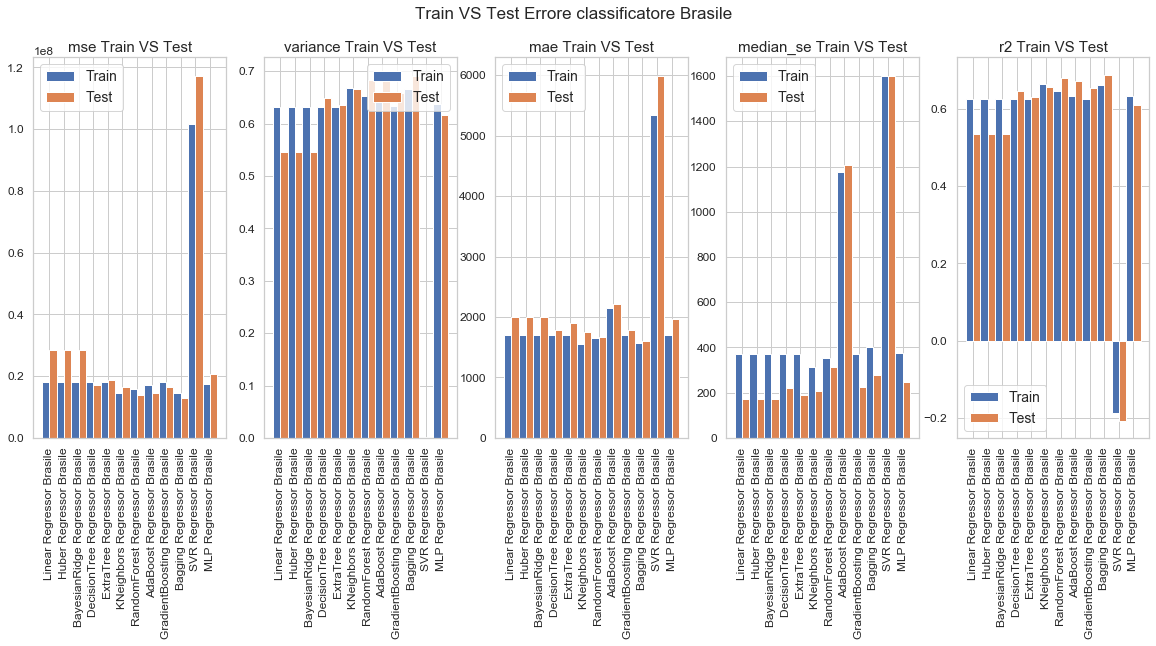

In [52]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Brasile', fontsize=17)
Function(score_df_train_Brasile,score_df_test_Brasile,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Brasile")

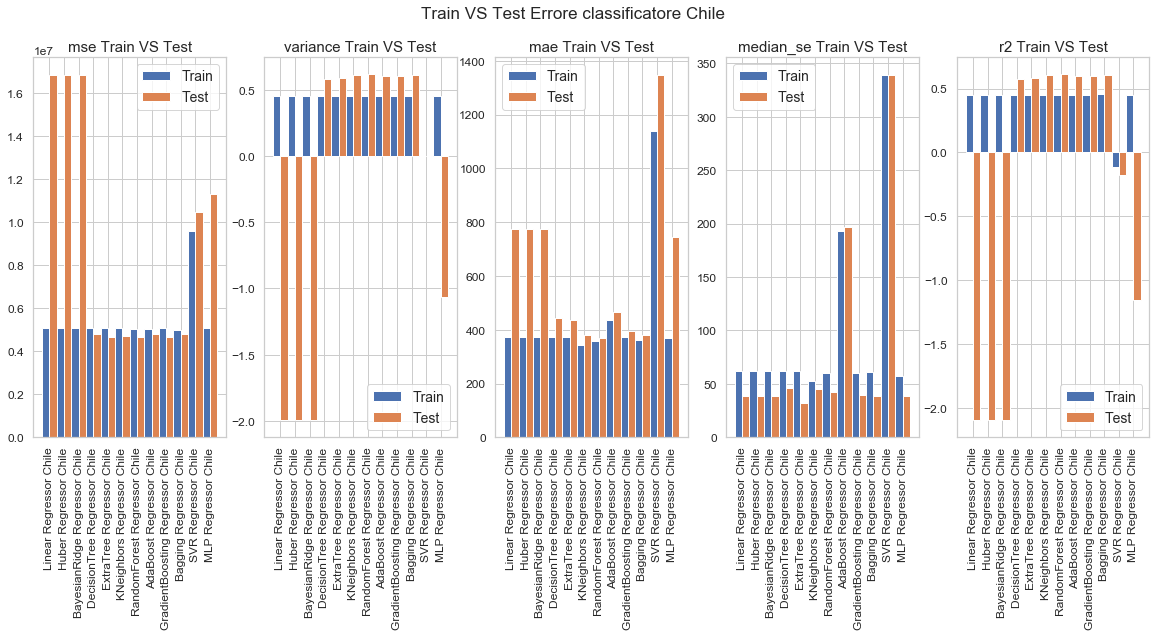

In [53]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Chile', fontsize=17)
Function(score_df_train_Chile,score_df_test_Chile,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Chile")

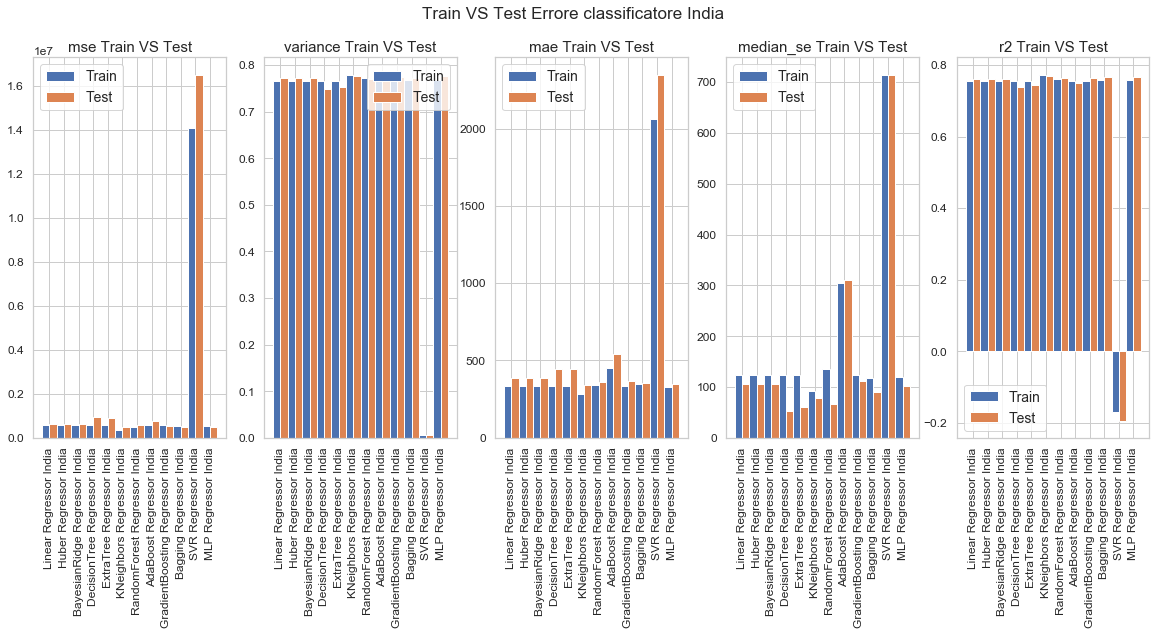

In [54]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore India', fontsize=17)
Function(score_df_train_India,score_df_test_India,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore India")

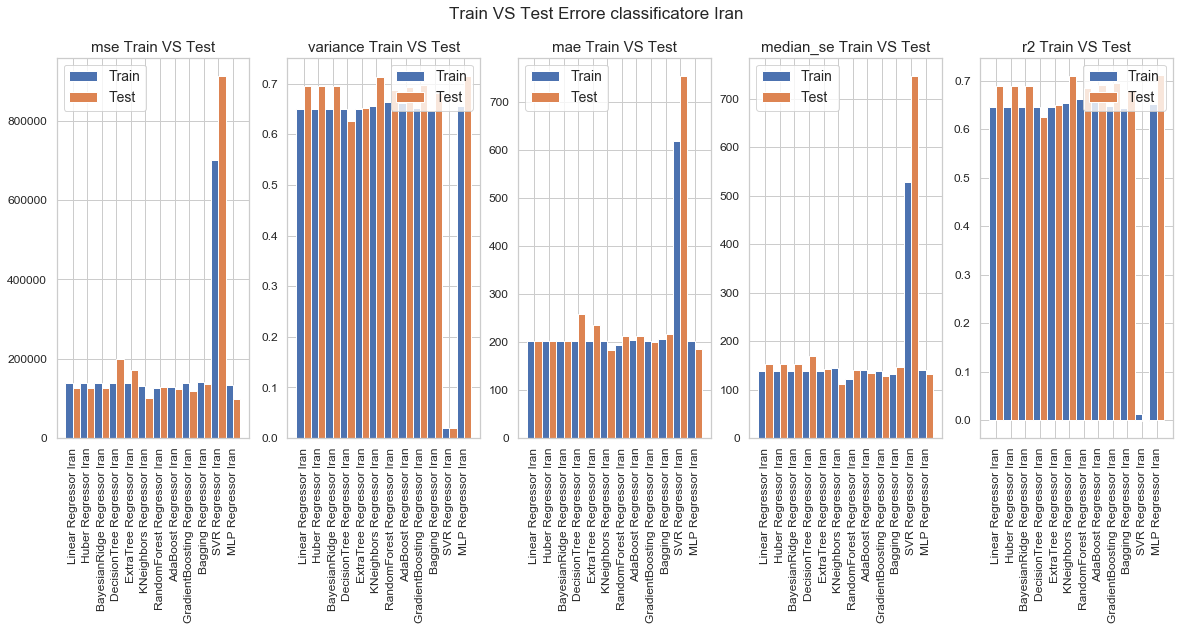

In [55]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Iran', fontsize=17)
Function(score_df_train_Iran,score_df_test_Iran,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Iran")

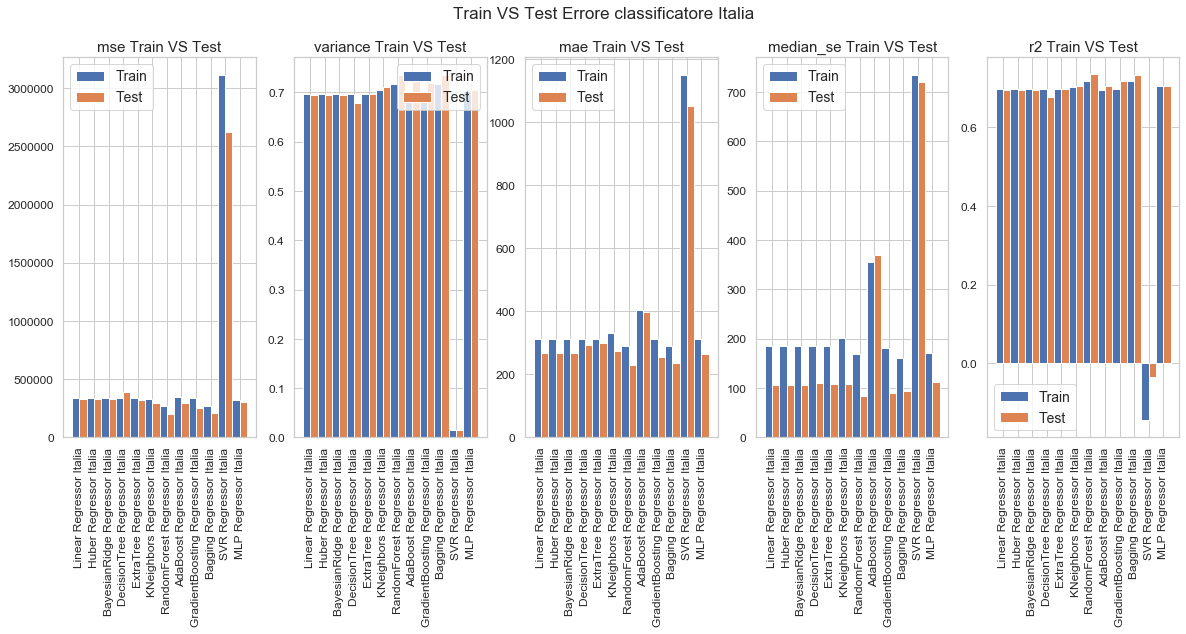

In [56]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Italia', fontsize=17)
Function(score_df_train_Italia,score_df_test_Italia,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Italia")

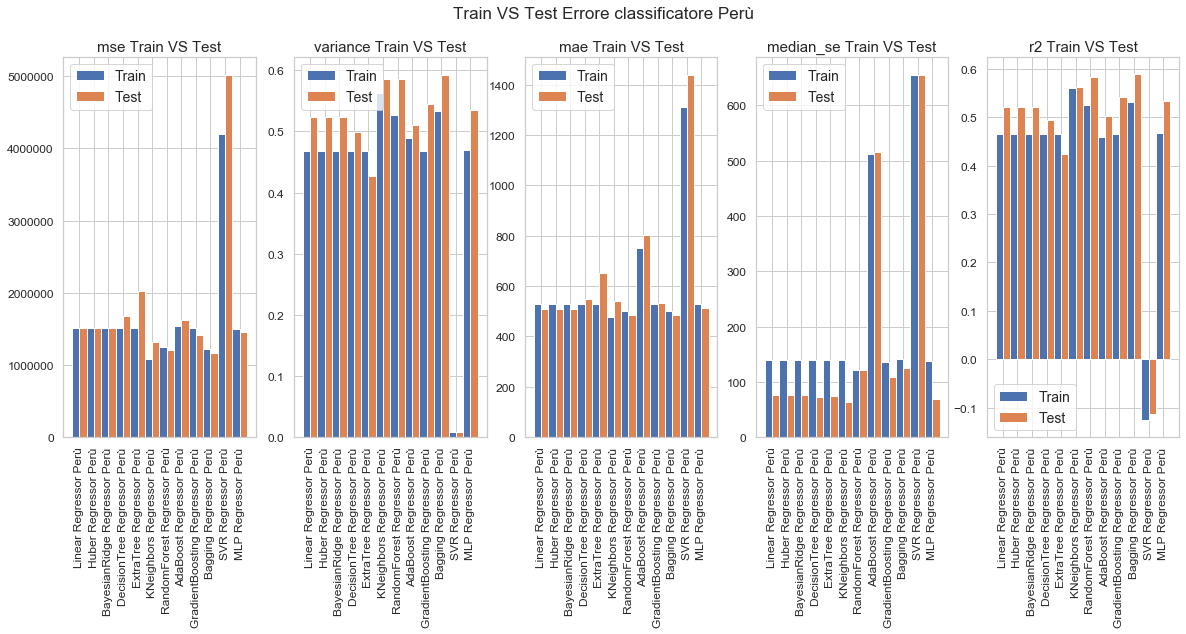

In [57]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Perù', fontsize=17)
Function(score_df_train_Perù,score_df_test_Perù,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Perù")

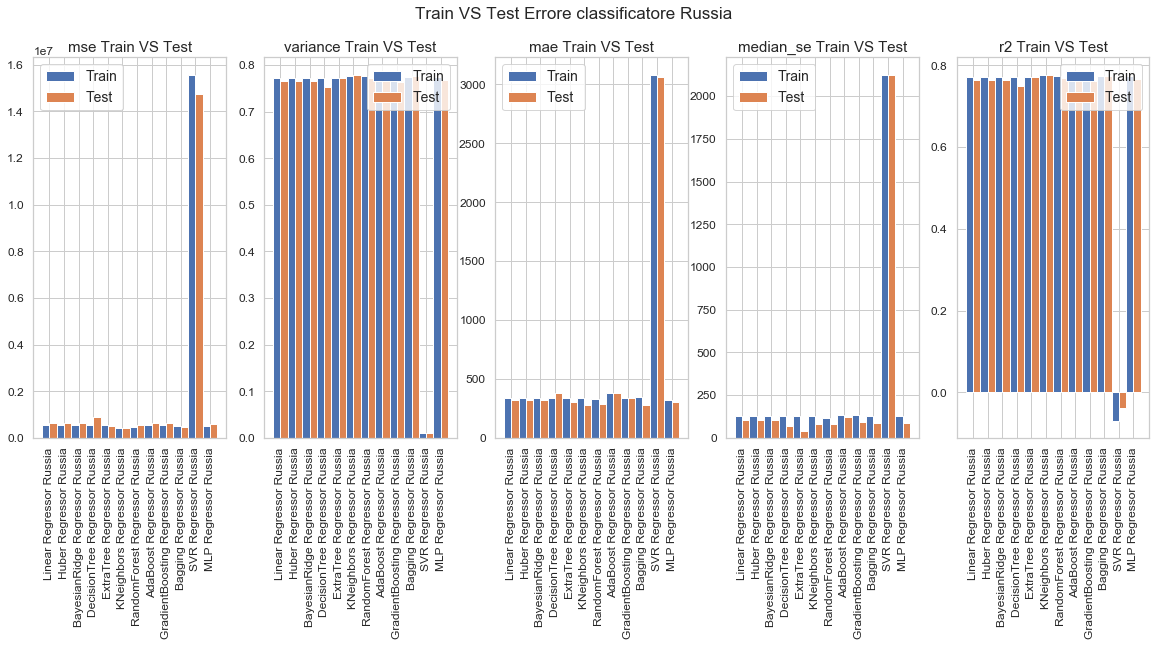

In [58]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Russia', fontsize=17)
Function(score_df_train_Russia,score_df_test_Russia,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Russia")

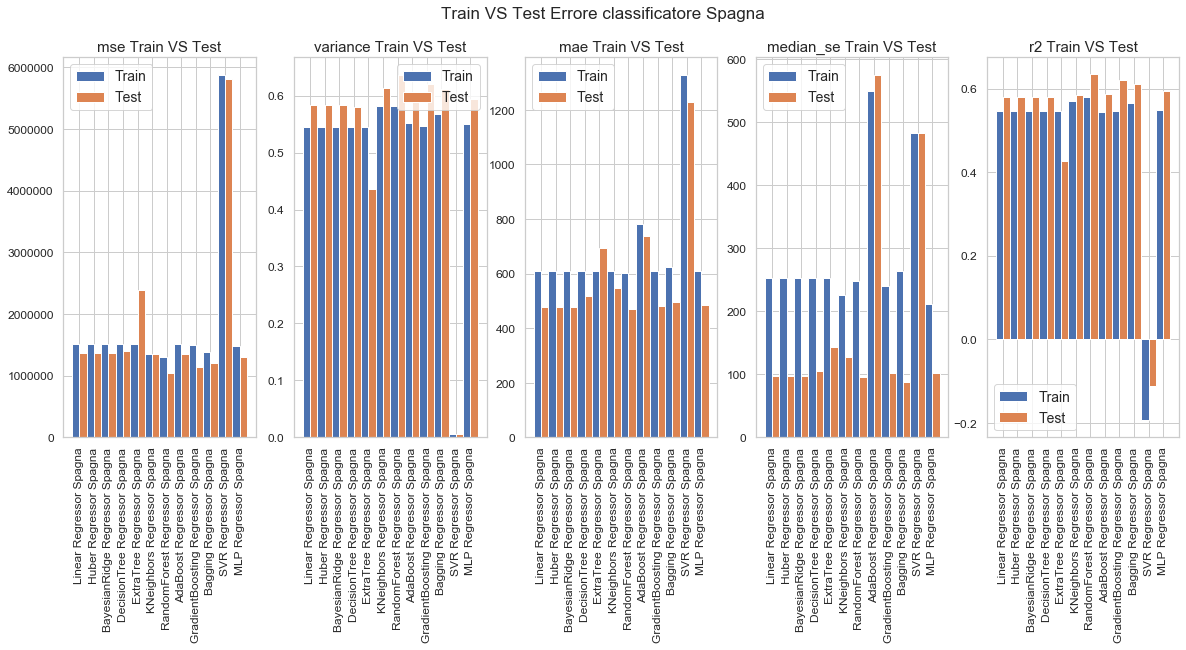

In [59]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Spagna', fontsize=17)
Function(score_df_train_Spagna,score_df_test_Spagna,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Spagna")

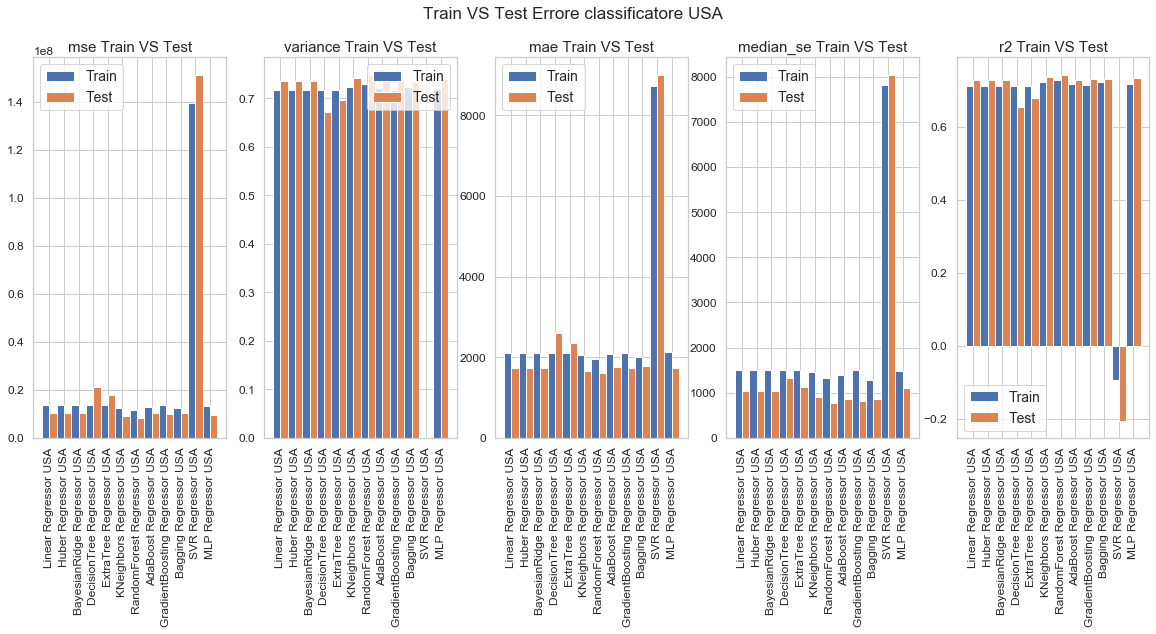

In [60]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore USA', fontsize=17)
Function(score_df_train_USA,score_df_test_USA,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore USA")

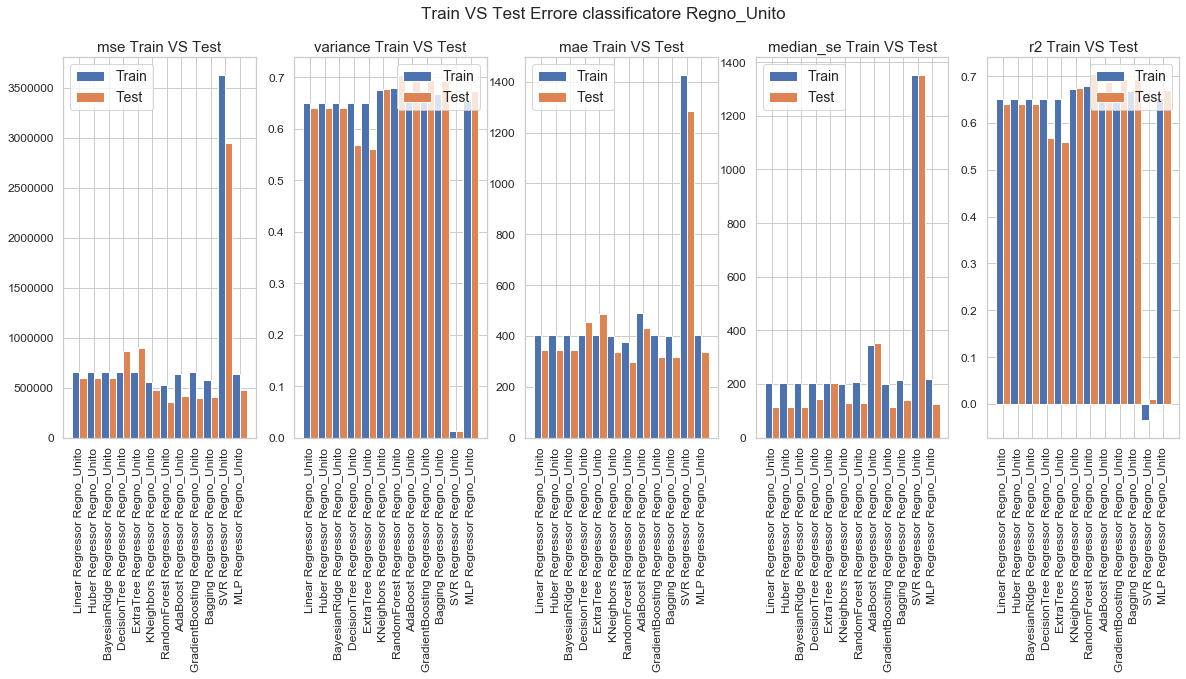

In [61]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.set_size_inches(20,7)
fig.suptitle('Train VS Test Errore classificatore Regno_Unito', fontsize=17)
Function(score_df_train_Regno_Unito,score_df_test_Regno_Unito,ax1,ax2,ax3,ax4,ax5)
# save_fig("Train VS Test Errore classificatore Regno_Unito")

---
# A CAUSA DEI RISULTATI OTTENUTI, PROVIAMO A FARE UN' ALTRA ANALISI UTILIZZANDO PIU' DATI RISPETTO AL SOLO UTILIZZO DEI SINGOLI CASI NELLA FASE DI ADDESTRAMENTO DEI REGRESSORI PER VEDERE SE OTTENIAMO RISULTATI MIGLIORI PER QUANTO RIGUARDA LE METRICHE USATE

---
## Preparazione dei dati 
#### Andiamo ad utilizzare un dataFrame che tiene conto dei [Paese,Confermati,Nuovi casi,Ricoverati,Nuovi Ricoverati,Morti,Nuovi morti,Lockdown] per ogni paese nella lista Dei Top10, nel periodo che va dal 22 gennaio all'23 giugno


In [62]:
Nuovi_Casi_Andamento_TOT=ts.copy()
m=0
LISTA= np.array(Nuovi_Casi_Andamento_TOT['Paese'])
L=Casi_tot_TOP_10.index
for i in LISTA:
    if i!=L[0] and i!=L[1] and i!=L[2] and i!=L[3] and i!=L[4] and i!=L[5] and i!=L[6] and i!=L[7] and i!=L[8] and i!=L[9]:
        Nuovi_Casi_Andamento_TOT.iloc[m] = np.nan
    m=m+1
Nuovi_Casi_Andamento_TOT=Nuovi_Casi_Andamento_TOT.dropna()
Nuovi_Casi_Andamento_TOT

Paese  Confermati  Nuovi casi  Ricoverati  \
2020-01-22          Brazil         0.0         0.0         0.0   
2020-01-22           Chile         0.0         0.0         0.0   
2020-01-22           India         0.0         0.0         0.0   
2020-01-22            Iran         0.0         0.0         0.0   
2020-01-22           Italy         0.0         0.0         0.0   
...                    ...         ...         ...         ...   
2020-06-23            Peru    260810.0      3363.0    148437.0   
2020-06-23          Russia    598878.0      7413.0    355847.0   
2020-06-23           Spain    246752.0       248.0    150376.0   
2020-06-23              US   2347022.0     34720.0    647548.0   
2020-06-23  United Kingdom    307682.0       921.0      1330.0   

            Nuovi Ricoverati     Morti  Nuovi morti Lockdown  
2020-01-22               0.0       0.0          0.0  NESSUNO  
2020-01-22               0.0       0.0          0.0   TOTALE  
2020-01-22               0.0       0.0          0.0   TOTALE  
2020-01-22               0.0       0.0          0.0   TOTALE  
2020-01-22               0.0       0.0          0.0   TOTALE  
...                      ...       ...          ...      ...  
2020-06-23            3117.0    8404.0        181.0   TOTALE  
2020-06-23           12000.0    8349.0        153.0   TOTALE  
2020-06-23               0.0   28325.0          1.0   TOTALE  
2020-06-23            7350.0  121228.0        826.0   TOTALE  
2020-06-23               8.0   43011.0        280.0   TOTALE  

[1540 rows x 8 columns]

---
## Binarizzo il valore del lockdown per fare in modo che sia utile nella fare di addestramento dell'algoritmo di regressione

Non tengo conto dell'attributo pese poichè è difficile da binarizzare e inoltre è poco rilevante.

In [63]:
Bin=ps.get_dummies(Nuovi_Casi_Andamento_TOT.Lockdown)

dati={"Paese":np.array(Nuovi_Casi_Andamento_TOT['Paese']),
     "Confermati":np.array(Nuovi_Casi_Andamento_TOT.Confermati),
     "Nuovi casi":np.array(Nuovi_Casi_Andamento_TOT["Nuovi casi"]),
     "Ricoverati":np.array(Nuovi_Casi_Andamento_TOT.Ricoverati),
     "Nuovi Ricoverati":np.array(Nuovi_Casi_Andamento_TOT["Nuovi Ricoverati"]),
     "Morti":np.array(Nuovi_Casi_Andamento_TOT.Morti),
     "Nuovi morti":np.array(Nuovi_Casi_Andamento_TOT["Nuovi morti"]),
     "Lockdown ":np.array(Bin.TOTALE)
     }
dates=Nuovi_Casi_Andamento_TOT.index
Nuovi_Casi_Andamento_TOT=ps.DataFrame(dati,index=dates)
Nuovi_Casi_Andamento_TOT

Paese  Confermati  Nuovi casi  Ricoverati  \
2020-01-22          Brazil         0.0         0.0         0.0   
2020-01-22           Chile         0.0         0.0         0.0   
2020-01-22           India         0.0         0.0         0.0   
2020-01-22            Iran         0.0         0.0         0.0   
2020-01-22           Italy         0.0         0.0         0.0   
...                    ...         ...         ...         ...   
2020-06-23            Peru    260810.0      3363.0    148437.0   
2020-06-23          Russia    598878.0      7413.0    355847.0   
2020-06-23           Spain    246752.0       248.0    150376.0   
2020-06-23              US   2347022.0     34720.0    647548.0   
2020-06-23  United Kingdom    307682.0       921.0      1330.0   

            Nuovi Ricoverati     Morti  Nuovi morti  Lockdown   
2020-01-22               0.0       0.0          0.0          0  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
...                      ...       ...          ...        ...  
2020-06-23            3117.0    8404.0        181.0          1  
2020-06-23           12000.0    8349.0        153.0          1  
2020-06-23               0.0   28325.0          1.0          1  
2020-06-23            7350.0  121228.0        826.0          1  
2020-06-23               8.0   43011.0        280.0          1  

[1540 rows x 8 columns]

---
# Matrice di correlazione
Attraverso la matrice di correlazione vediamo come sono correlate le varie nazioni andando a vedere i dati giornalieri.

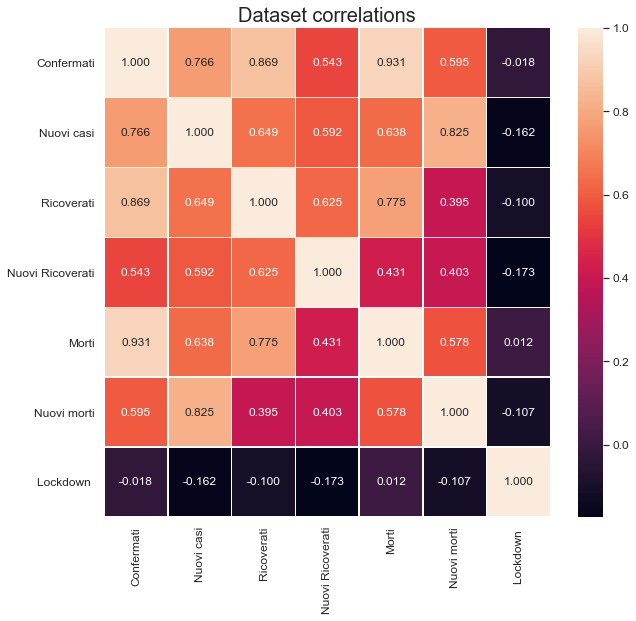

In [64]:
fig,ax = plt.subplots(figsize=(10,9))
fig = sns.heatmap(Nuovi_Casi_Andamento_TOT.corr(), annot=True,linewidths=.5,fmt='.3f')
plt.title("Dataset correlations", size=20)
plt.show()
figure = fig.get_figure()
# save_fig("Dataset correlations 2")

Notiamo di avere una Fortissima correlazione tra i dati.

Ovviamente risulta poca correlazione nel caso del LockDown poichè come abbiamo gia osservato soprà non è un attributo che dà una forte impronta sui valori delle altre colonne.


# Costruzione del Training Set
Prendiamo come data Iniziale sulla quale fare la predizione il 22-01-2020.

Da qui andiamo a definire un delta che sarà utile per costruire DELTA_i DataFrame che avranno al loro interno i valori delle tuple traslati a x + DELTA[i] giorni

## Ora creo questi 8 DataFrame, relativi alle date per ogni paese a distanza di Delta(i) giorni. 
Ogni Paese per ogni giorno avrà nella colonna yi il corrispettivo valore dei nuovi casi dopo Delta(i) giorni. 

Sfrutto le proprietà Derivate dalle TimeSeries per prendere intervalli di date. 

In [65]:
from datetime import timedelta
Delta=[1,2,3,4,5,6,7,8]

Y_1giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[0])):(datetime(2020, 6, 15)+timedelta(Delta[0]))].copy()
Y_1giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_2giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[1])):(datetime(2020, 6, 15)+timedelta(Delta[1]))].copy()
Y_2giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_3giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[2])):(datetime(2020, 6, 15)+timedelta(Delta[2]))].copy()
Y_3giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_4giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[3])):(datetime(2020, 6, 15)+timedelta(Delta[3]))].copy()
Y_4giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_5giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[4])):(datetime(2020, 6, 15)+timedelta(Delta[4]))].copy()
Y_5giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_6giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[5])):(datetime(2020, 6, 15)+timedelta(Delta[5]))].copy()
Y_6giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_7giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[6])):(datetime(2020, 6, 15)+timedelta(Delta[6]))].copy()
Y_7giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index
Y_8giorni_da_X=Nuovi_Casi_Andamento_TOT[(datetime(2020, 1, 22)+timedelta(Delta[7])):(datetime(2020, 6, 15)+timedelta(Delta[7]))].copy()
Y_8giorni_da_X.index=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)].index

In [66]:
Y_8giorni_da_X

Paese  Confermati  Nuovi casi  Ricoverati  \
2020-01-22          Brazil         0.0         0.0         0.0   
2020-01-22           Chile         0.0         0.0         0.0   
2020-01-22           India         1.0         1.0         0.0   
2020-01-22            Iran         0.0         0.0         0.0   
2020-01-22           Italy         0.0         0.0         0.0   
...                    ...         ...         ...         ...   
2020-06-15            Peru    260810.0      3363.0    148437.0   
2020-06-15          Russia    598878.0      7413.0    355847.0   
2020-06-15           Spain    246752.0       248.0    150376.0   
2020-06-15              US   2347022.0     34720.0    647548.0   
2020-06-15  United Kingdom    307682.0       921.0      1330.0   

            Nuovi Ricoverati     Morti  Nuovi morti  Lockdown   
2020-01-22               0.0       0.0          0.0          0  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
2020-01-22               0.0       0.0          0.0          1  
...                      ...       ...          ...        ...  
2020-06-15            3117.0    8404.0        181.0          1  
2020-06-15           12000.0    8349.0        153.0          1  
2020-06-15               0.0   28325.0          1.0          1  
2020-06-15            7350.0  121228.0        826.0          1  
2020-06-15               8.0   43011.0        280.0          1  

[1460 rows x 8 columns]

## Crea un train test e un set di test per X e Y
L'idea di lasciare che i dati guidino l'intero processo è allettante, tuttavia questo approccio può essere controproducente.

Per questo motivo, teniamo una parte dei dati che il nostro algoritmo non ha mai visto prima.Prima di fare ciò mi ridefinisco il Dataframe che sarà addestrato:
    
    -Questo DataFrame sarà indicativo di ogni Stato nella Lista dei TOP_10
    -Ogni Dataframe avrà 8 colonne , relativi agli attributi :
           -[Confermati,Nuovi casi,Ricoverati,Nuovi Ricoverati,Morti,Nuovi morti,Lockdown]

## Prima di crearli normalizziamo i nostri dati.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def Normalize (Lista,p):
    for i in Lista:
        I = i.values #returns a numpy array
        x_scaled = p.fit_transform(I)
        i = ps.DataFrame(x_scaled)
        
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

x=Nuovi_Casi_Andamento_TOT[:datetime(2020, 6, 15)]
del x['Paese']
y1=ps.DataFrame(Y_1giorni_da_X['Nuovi casi'])
y2=ps.DataFrame(Y_2giorni_da_X['Nuovi casi'])
y3=ps.DataFrame(Y_3giorni_da_X['Nuovi casi'])
y4=ps.DataFrame(Y_4giorni_da_X['Nuovi casi'])
y5=ps.DataFrame(Y_5giorni_da_X['Nuovi casi'])
y6=ps.DataFrame(Y_6giorni_da_X['Nuovi casi'])
y7=ps.DataFrame(Y_7giorni_da_X['Nuovi casi'])
y8=ps.DataFrame(Y_8giorni_da_X['Nuovi casi'])

Normalize([x],num_pipeline)
Normalize([y1,y2,y3,y4,y5,y6,y7,y8],num_pipeline)

#### Ora finamente possiamo definire i train_set e test_set su cui operare in seguito.

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set_X, test_set_X,train_set_Y1, test_set_Y1,train_set_Y2, test_set_Y2,train_set_Y3, test_set_Y3,train_set_Y4, test_set_Y4,train_set_Y5, test_set_Y5,train_set_Y6, test_set_Y6,train_set_Y7, test_set_Y7,train_set_Y8, test_set_Y8= train_test_split(x,y1,y2,y3,y4,y5,y6,y7,y8,test_size=0.3)

print("",len(train_set_X), "trainX +", len(test_set_X), "testX\n",len(train_set_Y1), "trainY1 +", len(test_set_Y1), "testY1\n",len(train_set_Y2), "trainY2 +", len(test_set_Y2), "testY2\n",
     len(train_set_Y3), "trainY3 +", len(test_set_Y3), "testY3\n",len(train_set_Y4), "trainY4 +", len(test_set_Y4), "testY4\n",len(train_set_Y5), "trainY5 +", len(test_set_Y5), "testY5\n",
     len(train_set_Y6), "trainY6 +", len(test_set_Y6), "testY6\n",len(train_set_Y7), "trainY7 +", len(test_set_Y7), "testY7\n",len(train_set_Y8), "trainY8 +", len(test_set_Y8), "testY8\n")

 1022 trainX + 438 testX
 1022 trainY1 + 438 testY1
 1022 trainY2 + 438 testY2
 1022 trainY3 + 438 testY3
 1022 trainY4 + 438 testY4
 1022 trainY5 + 438 testY5
 1022 trainY6 + 438 testY6
 1022 trainY7 + 438 testY7
 1022 trainY8 + 438 testY8



---
# Algoritmi di Regressione


In [69]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import*
import time

def compute_performance(classifiers,names,X,Y):
    score_dict = {}
    score_dict['Classifier'] = {}
    score_dict['mse'] = {}
    score_dict['variance']= {}
    score_dict['mae']= {}
    score_dict['median_se']= {}
    score_dict['r2']= {}
    j=0
    for i in range(len(classifiers)):
        
        value_predictions = classifiers[i].predict(X)
        
        if j==8:
            j=0
            
        y=Y[j]
        mse = mean_squared_error(y, value_predictions)
        variance = explained_variance_score(y,value_predictions)
        mae = mean_absolute_error(y,value_predictions)
        median_se = median_absolute_error(y, value_predictions)
        r2 = r2_score(y, value_predictions)
        
        name = names[i]
        score_dict['Classifier'][i] = name
        score_dict['mse'][i] = mse
        score_dict['variance'][i] = variance
        score_dict['mae'][i] = mae
        score_dict['median_se'][i] = median_se
        score_dict['r2'][i] = r2
        j=j+1
    return score_dict

### Definisco il metodo Addestra
Particolare metodo che richiamo durante la fase di addestramento, in modo tale che addestrò su ogni regressore degli 8 il train set, in base al corrispettivo TrainSet a distanza di DELTA[i] giorni:

In [70]:
regressor= []
names=[]

def addestra(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,L):
    reg1.fit(train_set_X, train_set_Y1)
    reg2.fit(train_set_X, train_set_Y2)
    reg3.fit(train_set_X, train_set_Y3)
    reg4.fit(train_set_X, train_set_Y4)
    reg5.fit(train_set_X, train_set_Y5)
    reg6.fit(train_set_X, train_set_Y6)
    reg7.fit(train_set_X, train_set_Y7)
    reg8.fit(train_set_X, train_set_Y8)
    REG=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8]
    for i in range(8):
        regressor.append(REG[i])
        names.append(L[i])
    

---
# Linear Models

## Linear Regressor

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg3 = LinearRegression()
lin_reg4 = LinearRegression()
lin_reg5 = LinearRegression()
lin_reg6 = LinearRegression()
lin_reg7 = LinearRegression()
lin_reg8 = LinearRegression()

n=["Linear Regressor x+1","Linear Regressor x+2","Linear Regressor x+3","Linear Regressor x+4","Linear Regressor x+5","Linear Regressor x+6","Linear Regressor x+7","Linear Regressor x+8"]
addestra(lin_reg1,lin_reg2,lin_reg3,lin_reg4,lin_reg5,lin_reg6,lin_reg7,lin_reg8,n)

## Huber Regressor

In [72]:
from sklearn.linear_model import HuberRegressor
Huber_reg1 = HuberRegressor()
Huber_reg2 = HuberRegressor()
Huber_reg3 = HuberRegressor()
Huber_reg4 = HuberRegressor()
Huber_reg5 = HuberRegressor()
Huber_reg6 = HuberRegressor()
Huber_reg7 = HuberRegressor()
Huber_reg8 = HuberRegressor()

n=["Huber Regressor x+1","Huber Regressor x+2","Huber Regressor x+3","Huber Regressor x+4","Huber Regressor x+5","Huber Regressor x+6","Huber Regressor x+7","Huber Regressor x+8"]
addestra(Huber_reg1,Huber_reg2,Huber_reg3,Huber_reg4,Huber_reg5,Huber_reg6,Huber_reg7,Huber_reg8,n)

## Bayesian Ridge Regressor

In [73]:
from sklearn.linear_model import BayesianRidge
BayesianRidge_reg1 = BayesianRidge()
BayesianRidge_reg2 = BayesianRidge()
BayesianRidge_reg3 = BayesianRidge()
BayesianRidge_reg4 = BayesianRidge()
BayesianRidge_reg5 = BayesianRidge()
BayesianRidge_reg6 = BayesianRidge()
BayesianRidge_reg7 = BayesianRidge()
BayesianRidge_reg8 = BayesianRidge()

n=["BayesianRidge Regressor x+1","BayesianRidge Regressor x+2","BayesianRidge Regressor x+3","BayesianRidge Regressor x+4","BayesianRidge Regressor x+5","BayesianRidge Regressor x+6","BayesianRidge Regressor x+7","BayesianRidge Regressor x+8"]
addestra(BayesianRidge_reg1,BayesianRidge_reg2,BayesianRidge_reg3,BayesianRidge_reg4,BayesianRidge_reg5,BayesianRidge_reg6,BayesianRidge_reg7,BayesianRidge_reg8,n)

# Tree Models

## DecisionTree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor_reg1 = DecisionTreeRegressor()
DecisionTreeRegressor_reg2 = DecisionTreeRegressor()
DecisionTreeRegressor_reg3 = DecisionTreeRegressor()
DecisionTreeRegressor_reg4 = DecisionTreeRegressor()
DecisionTreeRegressor_reg5 = DecisionTreeRegressor()
DecisionTreeRegressor_reg6 = DecisionTreeRegressor()
DecisionTreeRegressor_reg7 = DecisionTreeRegressor()
DecisionTreeRegressor_reg8 = DecisionTreeRegressor()

n=["DecisionTree Regressor x+1","DecisionTree Regressor x+2","DecisionTree Regressor x+3","DecisionTree Regressor x+4","DecisionTree Regressor x+5","DecisionTree Regressor x+6","DecisionTree Regressor x+7","DecisionTree Regressor x+8"]
addestra(DecisionTreeRegressor_reg1,DecisionTreeRegressor_reg2,DecisionTreeRegressor_reg3,DecisionTreeRegressor_reg4,DecisionTreeRegressor_reg5,DecisionTreeRegressor_reg6,DecisionTreeRegressor_reg7,DecisionTreeRegressor_reg8,n)

## ExtraTree Regressor

In [75]:
from sklearn.tree import ExtraTreeRegressor
ExtraTreeRegressor_reg1 = ExtraTreeRegressor()
ExtraTreeRegressor_reg2 = ExtraTreeRegressor()
ExtraTreeRegressor_reg3 = ExtraTreeRegressor()
ExtraTreeRegressor_reg4 = ExtraTreeRegressor()
ExtraTreeRegressor_reg5 = ExtraTreeRegressor()
ExtraTreeRegressor_reg6 = ExtraTreeRegressor()
ExtraTreeRegressor_reg7 = ExtraTreeRegressor()
ExtraTreeRegressor_reg8 = ExtraTreeRegressor()

n=["ExtraTree Regressor x+1","ExtraTree Regressor x+2","ExtraTree Regressor x+3","ExtraTree Regressor x+4","ExtraTree Regressor x+5","ExtraTree Regressor x+6","ExtraTree Regressor x+7","ExtraTree Regressor x+8"]
addestra(ExtraTreeRegressor_reg1,ExtraTreeRegressor_reg2,ExtraTreeRegressor_reg3,ExtraTreeRegressor_reg4,ExtraTreeRegressor_reg5,ExtraTreeRegressor_reg6,ExtraTreeRegressor_reg7,ExtraTreeRegressor_reg8,n)

# Instance based Regressors

## K Neighbour Regressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor_reg1 = KNeighborsRegressor()
KNeighborsRegressor_reg2 = KNeighborsRegressor()
KNeighborsRegressor_reg3 = KNeighborsRegressor()
KNeighborsRegressor_reg4 = KNeighborsRegressor()
KNeighborsRegressor_reg5 = KNeighborsRegressor()
KNeighborsRegressor_reg6 = KNeighborsRegressor()
KNeighborsRegressor_reg7 = KNeighborsRegressor()
KNeighborsRegressor_reg8 = KNeighborsRegressor()

n=["KNeighbors Regressor x+1","KNeighbors Regressor x+2","KNeighbors Regressor x+3","KNeighbors Regressor x+4","KNeighbors Regressor x+5","KNeighbors Regressor x+6","KNeighbors Regressor x+7","KNeighbors Regressor x+8"]
addestra(KNeighborsRegressor_reg1,KNeighborsRegressor_reg2,KNeighborsRegressor_reg3,KNeighborsRegressor_reg4,KNeighborsRegressor_reg5,KNeighborsRegressor_reg6,KNeighborsRegressor_reg7,KNeighborsRegressor_reg8,n)

# Ensemble Models

## Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor_reg1 = RandomForestRegressor()
RandomForestRegressor_reg2 = RandomForestRegressor()
RandomForestRegressor_reg3 = RandomForestRegressor()
RandomForestRegressor_reg4 = RandomForestRegressor()
RandomForestRegressor_reg5 = RandomForestRegressor()
RandomForestRegressor_reg6 = RandomForestRegressor()
RandomForestRegressor_reg7 = RandomForestRegressor()
RandomForestRegressor_reg8 = RandomForestRegressor()

n=["RandomForest Regressor x+1","RandomForest Regressor x+2","RandomForest Regressor x+3","RandomForest Regressor x+4","RandomForest Regressor x+5","RandomForest Regressor x+6","RandomForest Regressor x+7","RandomForest Regressor x+8"]
addestra(RandomForestRegressor_reg1,RandomForestRegressor_reg2,RandomForestRegressor_reg3,RandomForestRegressor_reg4,RandomForestRegressor_reg5,RandomForestRegressor_reg6,RandomForestRegressor_reg7,RandomForestRegressor_reg8,n)

## AdaBoost Regressor

In [78]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor_reg1 = AdaBoostRegressor()
AdaBoostRegressor_reg2 = AdaBoostRegressor()
AdaBoostRegressor_reg3 = AdaBoostRegressor()
AdaBoostRegressor_reg4 = AdaBoostRegressor()
AdaBoostRegressor_reg5 = AdaBoostRegressor()
AdaBoostRegressor_reg6 = AdaBoostRegressor()
AdaBoostRegressor_reg7 = AdaBoostRegressor()
AdaBoostRegressor_reg8 = AdaBoostRegressor()

n=["AdaBoost Regressor x+1","AdaBoost Regressor x+2","AdaBoost Regressor x+3","AdaBoost Regressor x+4","AdaBoost Regressor x+5","AdaBoost Regressor x+6","AdaBoost Regressor x+7","AdaBoost Regressor x+8"]
addestra(AdaBoostRegressor_reg1,AdaBoostRegressor_reg2,AdaBoostRegressor_reg3,AdaBoostRegressor_reg4,AdaBoostRegressor_reg5,AdaBoostRegressor_reg6,AdaBoostRegressor_reg7,AdaBoostRegressor_reg8,n)

## Gradient Boosting Regressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor_reg1 = GradientBoostingRegressor()
GradientBoostingRegressor_reg2 = GradientBoostingRegressor()
GradientBoostingRegressor_reg3 = GradientBoostingRegressor()
GradientBoostingRegressor_reg4 = GradientBoostingRegressor()
GradientBoostingRegressor_reg5 = GradientBoostingRegressor()
GradientBoostingRegressor_reg6 = GradientBoostingRegressor()
GradientBoostingRegressor_reg7 = GradientBoostingRegressor()
GradientBoostingRegressor_reg8 = GradientBoostingRegressor()

n=["GradientBoosting Regressor x+1","GradientBoosting Regressor x+2","GradientBoosting Regressor x+3","GradientBoosting Regressor x+4","GradientBoosting Regressor x+5","GradientBoosting Regressor x+6","GradientBoosting Regressor x+7","GradientBoosting Regressor x+8"]
addestra(GradientBoostingRegressor_reg1,GradientBoostingRegressor_reg2,GradientBoostingRegressor_reg3,GradientBoostingRegressor_reg4,GradientBoostingRegressor_reg5,GradientBoostingRegressor_reg6,GradientBoostingRegressor_reg7,GradientBoostingRegressor_reg8,n)

## Bagging Regressor

In [80]:
from sklearn.ensemble import BaggingRegressor
BaggingRegressor_reg1= BaggingRegressor()
BaggingRegressor_reg2= BaggingRegressor()
BaggingRegressor_reg3= BaggingRegressor()
BaggingRegressor_reg4= BaggingRegressor()
BaggingRegressor_reg5= BaggingRegressor()
BaggingRegressor_reg6= BaggingRegressor()
BaggingRegressor_reg7= BaggingRegressor()
BaggingRegressor_reg8= BaggingRegressor()

n=["Bagging Regressor x+1","Bagging Regressor x+2","Bagging Regressor x+3","Bagging Regressor x+4","Bagging Regressor x+5","Bagging Regressor x+6","Bagging Regressor x+7","Bagging Regressor x+8"]
addestra(BaggingRegressor_reg1,BaggingRegressor_reg2,BaggingRegressor_reg3,BaggingRegressor_reg4,BaggingRegressor_reg5,BaggingRegressor_reg6,BaggingRegressor_reg7,BaggingRegressor_reg8,n)

# SVR Models

## Support Vector Machine Regressor

In [81]:
from sklearn.svm import SVR
SVR_reg1 = SVR()
SVR_reg2 = SVR()
SVR_reg3 = SVR()
SVR_reg4 = SVR()
SVR_reg5 = SVR()
SVR_reg6 = SVR()
SVR_reg7 = SVR()
SVR_reg8 = SVR()

n=["SVR Regressor x+1","SVR Regressor x+2","SVR Regressor x+3","SVR Regressor x+4","SVR Regressor x+5","SVR Regressor x+6","SVR Regressor x+7","SVR Regressor x+8"]
addestra(SVR_reg1,SVR_reg2,SVR_reg3,SVR_reg4,SVR_reg5,SVR_reg6,SVR_reg7,SVR_reg8,n)

# Neural Network Models Regressor

## MLP Regressor

In [82]:
from sklearn.neural_network import MLPRegressor
MLPRegressor_reg1 = MLPRegressor()
MLPRegressor_reg2 = MLPRegressor()
MLPRegressor_reg3 = MLPRegressor()
MLPRegressor_reg4 = MLPRegressor()
MLPRegressor_reg5 = MLPRegressor()
MLPRegressor_reg6 = MLPRegressor()
MLPRegressor_reg7 = MLPRegressor()
MLPRegressor_reg8 = MLPRegressor()

n=["MLP Regressor x+1","MLP Regressor x+2","MLP Regressor x+3","MLP Regressor x+4","MLP Regressor x+5","MLP Regressor x+6","MLP Regressor x+7","MLP Regressor x+8"]
addestra(MLPRegressor_reg1,MLPRegressor_reg2,MLPRegressor_reg3,MLPRegressor_reg4,MLPRegressor_reg5,MLPRegressor_reg6,MLPRegressor_reg7,MLPRegressor_reg8,n)

---
# VALUTAZIONE PERFORMANCE 
### VALUTAZIONE SUI TRAIN SET
Per la valutazione prendo i dati e li inserisco in 8 Dataframe in modo da avere i corrispettivi Valori di ogni singolo DELTA[i] per le metriche usate.

In [83]:
yT=[train_set_Y1,train_set_Y2,train_set_Y3,train_set_Y4,train_set_Y5,train_set_Y6,train_set_Y7,train_set_Y8]
score_dict_train = compute_performance(regressor, names, train_set_X,yT)
score_df_train = ps.DataFrame(score_dict_train)
score_df_train_DELTA1=score_df_train.iloc[lambda x: x.index % 8 == 0].reset_index(drop=True)
score_df_train_DELTA2=score_df_train.iloc[lambda x: x.index % 8 == 1].reset_index(drop=True)
score_df_train_DELTA3=score_df_train.iloc[lambda x: x.index % 8 == 2].reset_index(drop=True)
score_df_train_DELTA4=score_df_train.iloc[lambda x: x.index % 8 == 3].reset_index(drop=True)
score_df_train_DELTA5=score_df_train.iloc[lambda x: x.index % 8 == 4].reset_index(drop=True)
score_df_train_DELTA6=score_df_train.iloc[lambda x: x.index % 8 == 5].reset_index(drop=True)
score_df_train_DELTA7=score_df_train.iloc[lambda x: x.index % 8 == 6].reset_index(drop=True)
score_df_train_DELTA8=score_df_train.iloc[lambda x: x.index % 8 == 7].reset_index(drop=True)

In [84]:
score_df_train_DELTA1

Classifier           mse  variance          mae  \
0             Linear Regressor x+1  2.005151e+06  0.956369   636.572119   
1              Huber Regressor x+1  2.147156e+06  0.953524   569.576106   
2      BayesianRidge Regressor x+1  2.015362e+06  0.956147   628.486995   
3       DecisionTree Regressor x+1  3.421213e-01  1.000000     0.089983   
4          ExtraTree Regressor x+1  3.421213e-01  1.000000     0.089983   
5         KNeighbors Regressor x+1  3.133238e+06  0.932234   659.632877   
6       RandomForest Regressor x+1  2.961950e+05  0.993555   213.293572   
7           AdaBoost Regressor x+1  1.797994e+06  0.967334  1024.595931   
8   GradientBoosting Regressor x+1  4.248349e+05  0.990756   348.934456   
9            Bagging Regressor x+1  3.422861e+05  0.992559   228.033093   
10               SVR Regressor x+1  5.324725e+07  0.011207  3546.086468   
11               MLP Regressor x+1  2.029769e+06  0.956071   611.611277   

     median_se        r2  
0   198.926351  0.956369  
1   122.631540  0.953279  
2   170.360929  0.956147  
3     0.000000  1.000000  
4     0.000000  1.000000  
5   109.900000  0.931822  
6    44.430000  0.993555  
7   640.047619  0.960876  
8   132.172240  0.990756  
9    43.150000  0.992552  
10  873.370733 -0.158635  
11  181.986642  0.955833

---
### VALUTAZIONE SUI TEST SET

In [85]:
yTest=[test_set_Y1,test_set_Y2,test_set_Y3,test_set_Y4,test_set_Y5,test_set_Y6,test_set_Y7,test_set_Y8]
score_dict_test = compute_performance(regressor,names,test_set_X,yTest)
score_df_test = ps.DataFrame(score_dict_test)
score_df_test_DELTA1=score_df_test.iloc[lambda x: x.index % 8 == 0].reset_index(drop=True)
score_df_test_DELTA2=score_df_test.iloc[lambda x: x.index % 8 == 1].reset_index(drop=True)
score_df_test_DELTA3=score_df_test.iloc[lambda x: x.index % 8 == 2].reset_index(drop=True)
score_df_test_DELTA4=score_df_test.iloc[lambda x: x.index % 8 == 3].reset_index(drop=True)
score_df_test_DELTA5=score_df_test.iloc[lambda x: x.index % 8 == 4].reset_index(drop=True)
score_df_test_DELTA6=score_df_test.iloc[lambda x: x.index % 8 == 5].reset_index(drop=True)
score_df_test_DELTA7=score_df_test.iloc[lambda x: x.index % 8 == 6].reset_index(drop=True)
score_df_test_DELTA8=score_df_test.iloc[lambda x: x.index % 8 == 7].reset_index(drop=True)

In [86]:
score_df_test_DELTA8

Classifier           mse  variance          mae  \
0             Linear Regressor x+8  7.406544e+06  0.852059  1409.634774   
1              Huber Regressor x+8  7.577455e+06  0.851610  1261.517767   
2      BayesianRidge Regressor x+8  7.520094e+06  0.849683  1412.740747   
3       DecisionTree Regressor x+8  7.775873e+06  0.844428  1148.916009   
4          ExtraTree Regressor x+8  6.767120e+06  0.864414  1096.432751   
5         KNeighbors Regressor x+8  1.068142e+07  0.786139  1469.760274   
6       RandomForest Regressor x+8  4.643638e+06  0.907046   952.951657   
7           AdaBoost Regressor x+8  9.950787e+06  0.849407  2511.302941   
8   GradientBoosting Regressor x+8  4.675148e+06  0.906305   997.847094   
9            Bagging Regressor x+8  4.854198e+06  0.902734   954.454078   
10               SVR Regressor x+8  5.755684e+07  0.007937  3849.265987   
11               MLP Regressor x+8  7.587036e+06  0.848666  1304.995404   

      median_se        r2  
0    434.883622  0.851566  
1    329.574018  0.848140  
2    447.075669  0.849290  
3    187.500000  0.844164  
4    195.000000  0.864380  
5    225.900000  0.785934  
6    189.695000  0.906937  
7   2524.638462  0.800576  
8    214.362546  0.906305  
9    164.400000  0.902717  
10  1150.014815 -0.153496  
11   343.890513  0.847948

---
# PLOTTO I RISUTATI OTTENUTI ,PER OGNI SINGOLO GIORNO
UTILIZZO QUESTI i DUE METODI SOPRA DEFINITI, OSSIA PLOT() E Function() PER FACILITARE LA FASE STAMPA E LA CREAZIONE DEI SINGOLI PLOT.

OGNI PLOT RAFFIGURERA' L'ERRORE COMMESSO DA OGNI REGRESSORE A DISTANZA DI DELTA[I] GIORNI

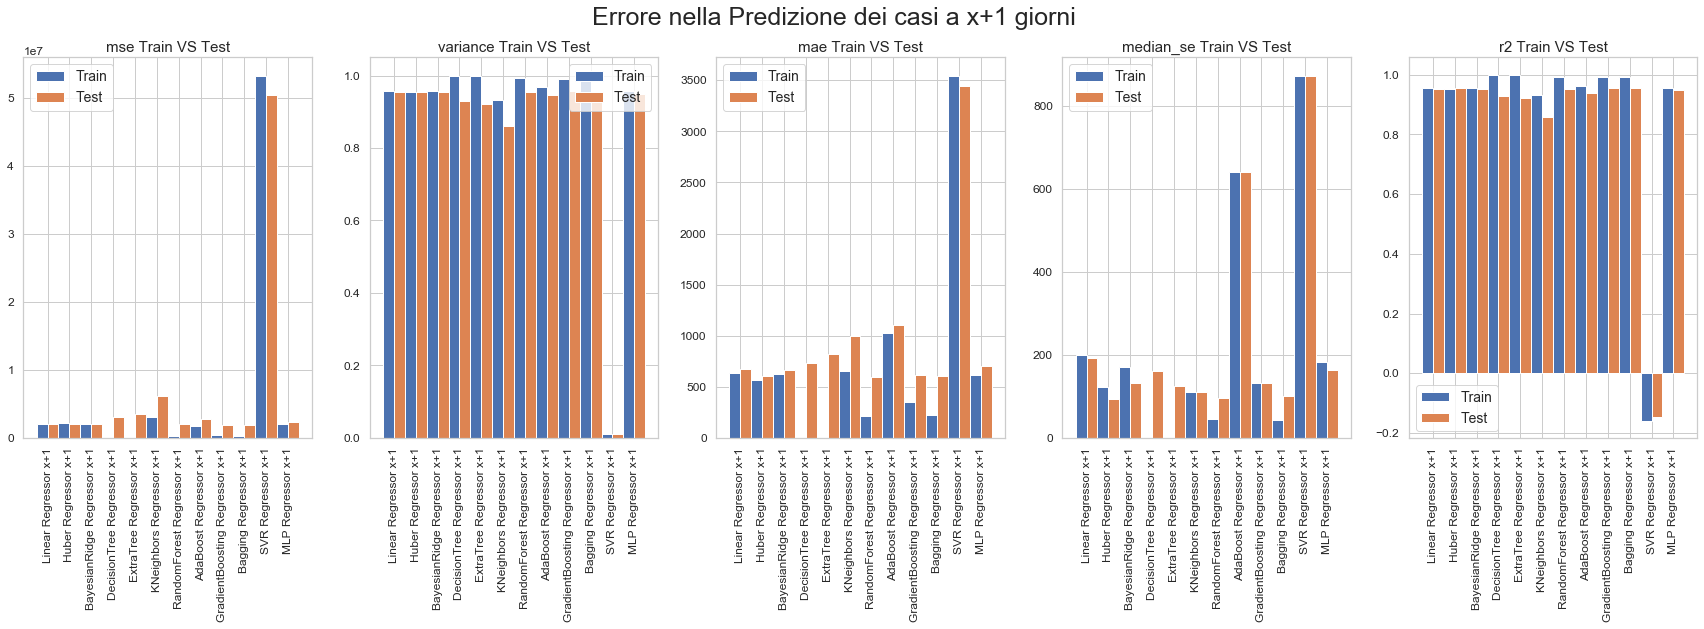

In [87]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+1 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA1,score_df_test_DELTA1,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+1 giorni")

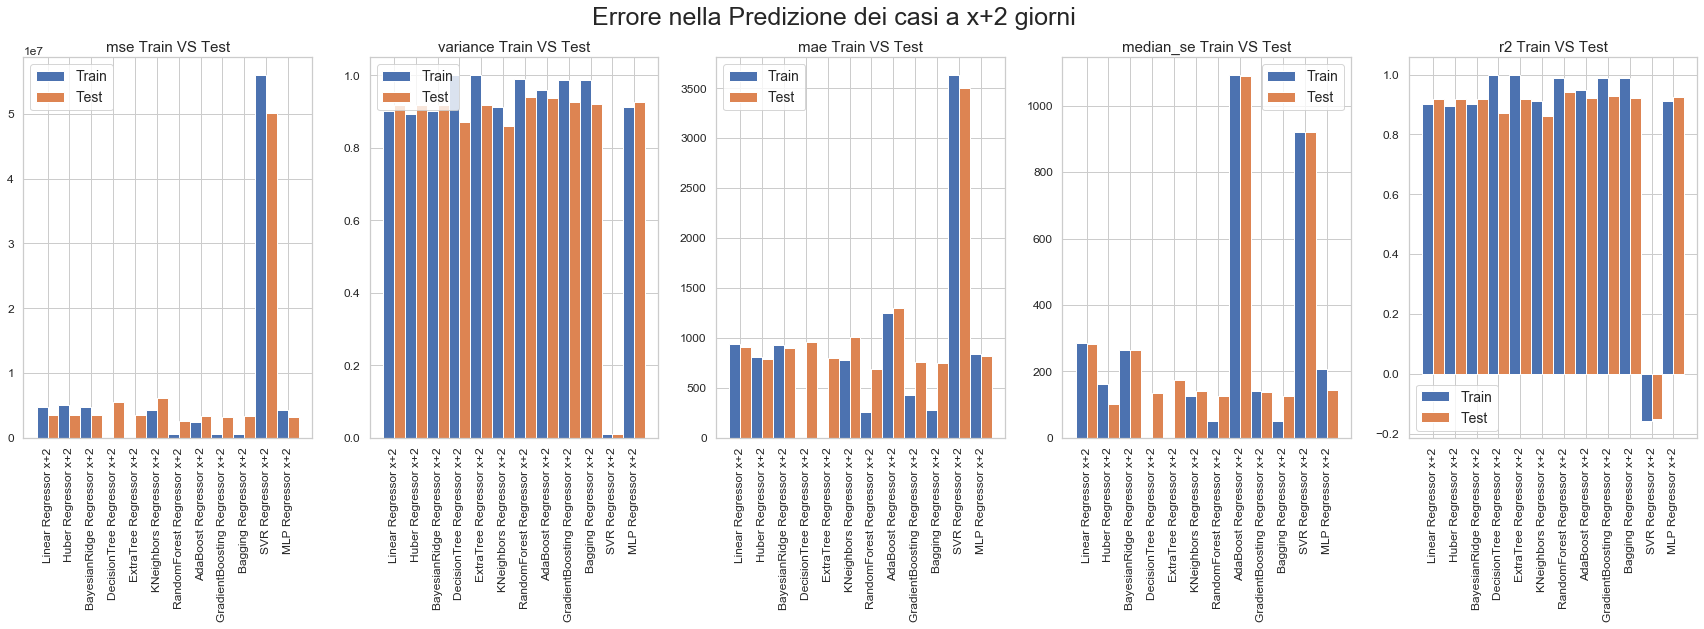

In [88]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+2 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA2,score_df_test_DELTA2,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+2 giorni")

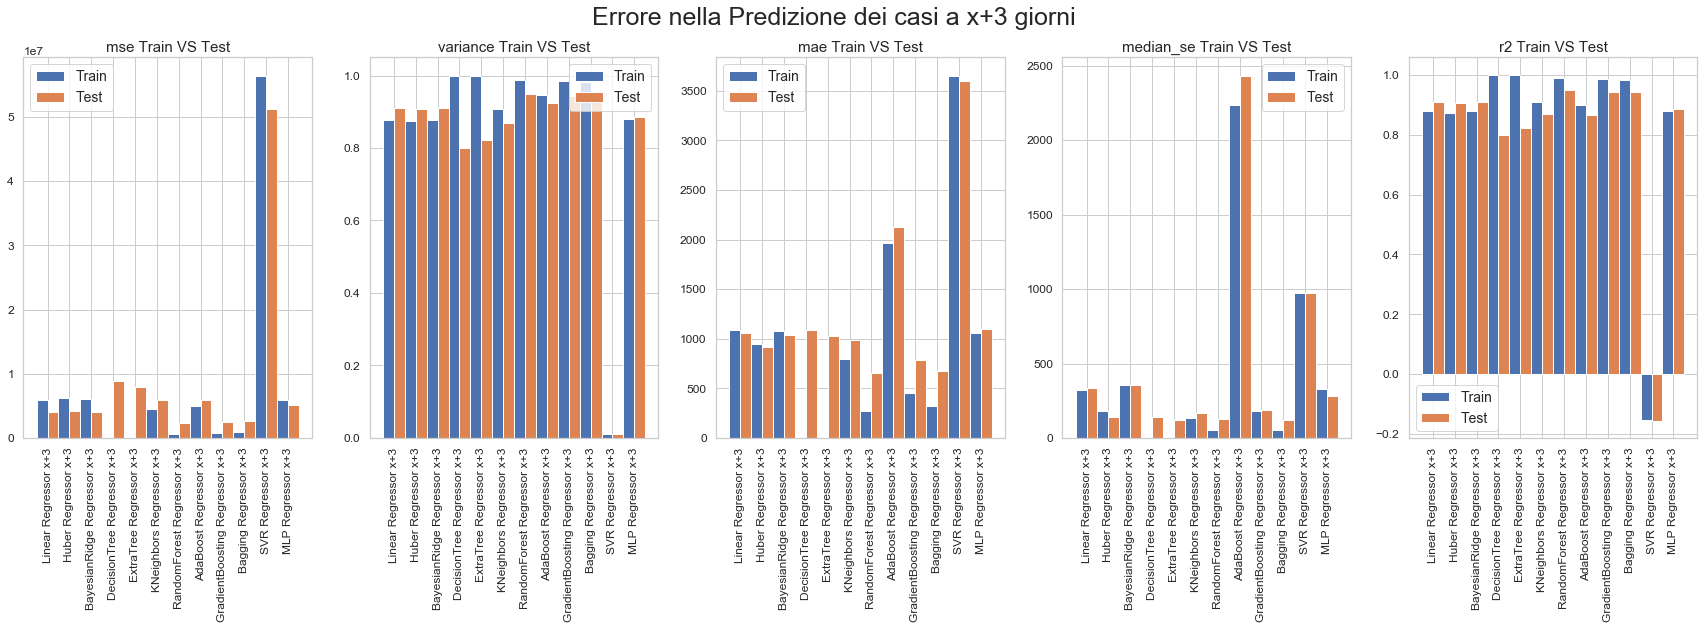

In [89]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+3 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA3,score_df_test_DELTA3,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+3 giorni")

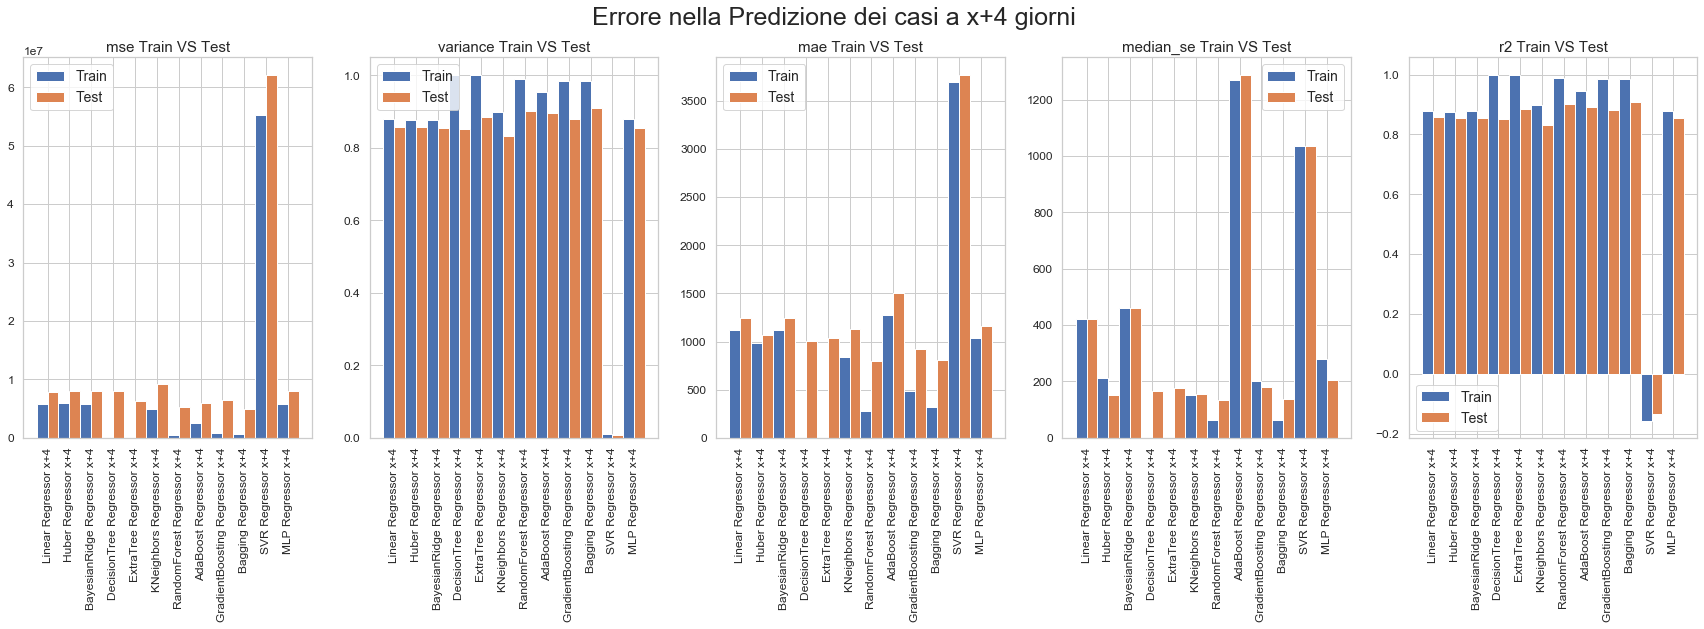

In [90]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+4 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA4,score_df_test_DELTA4,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+4 giorni")

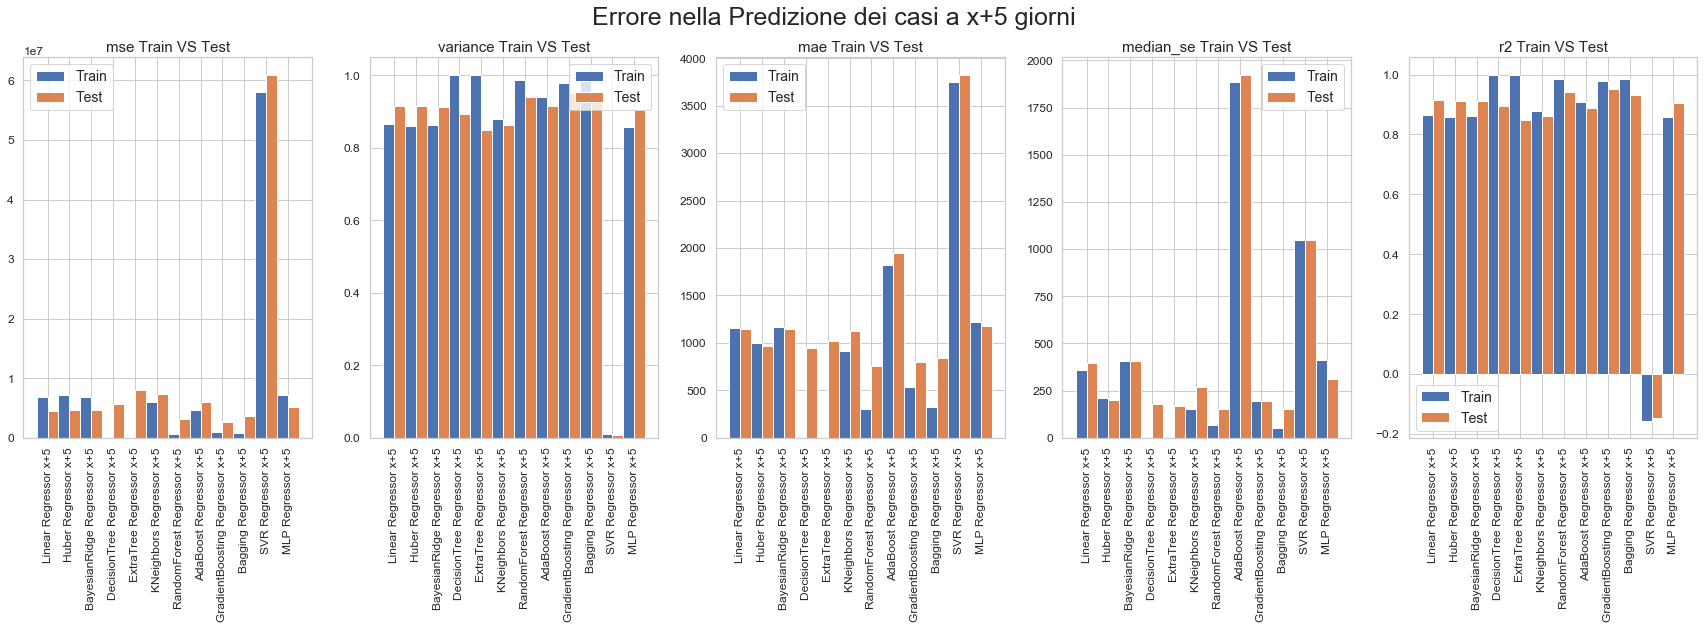

In [91]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+5 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA5,score_df_test_DELTA5,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+5 giorni")

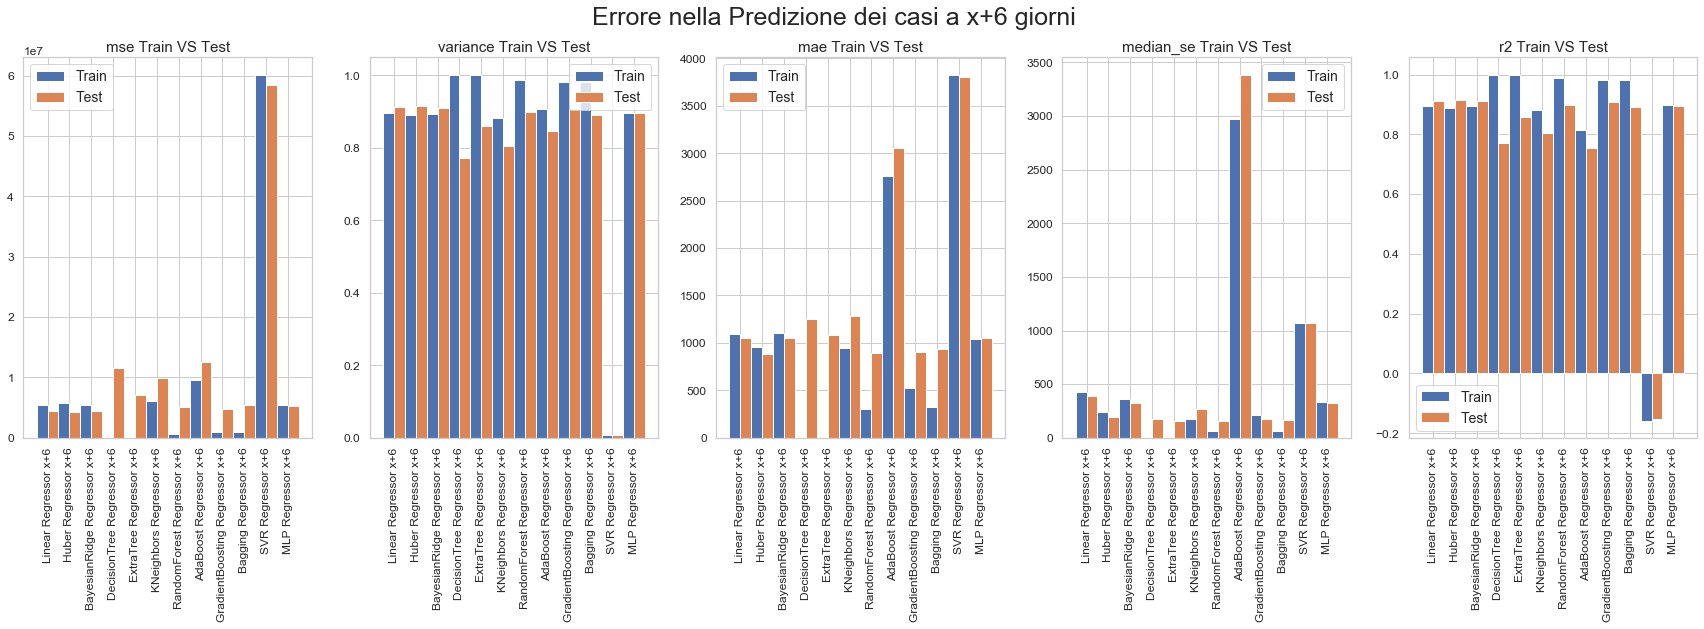

In [92]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+6 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA6,score_df_test_DELTA6,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+6 giorni")

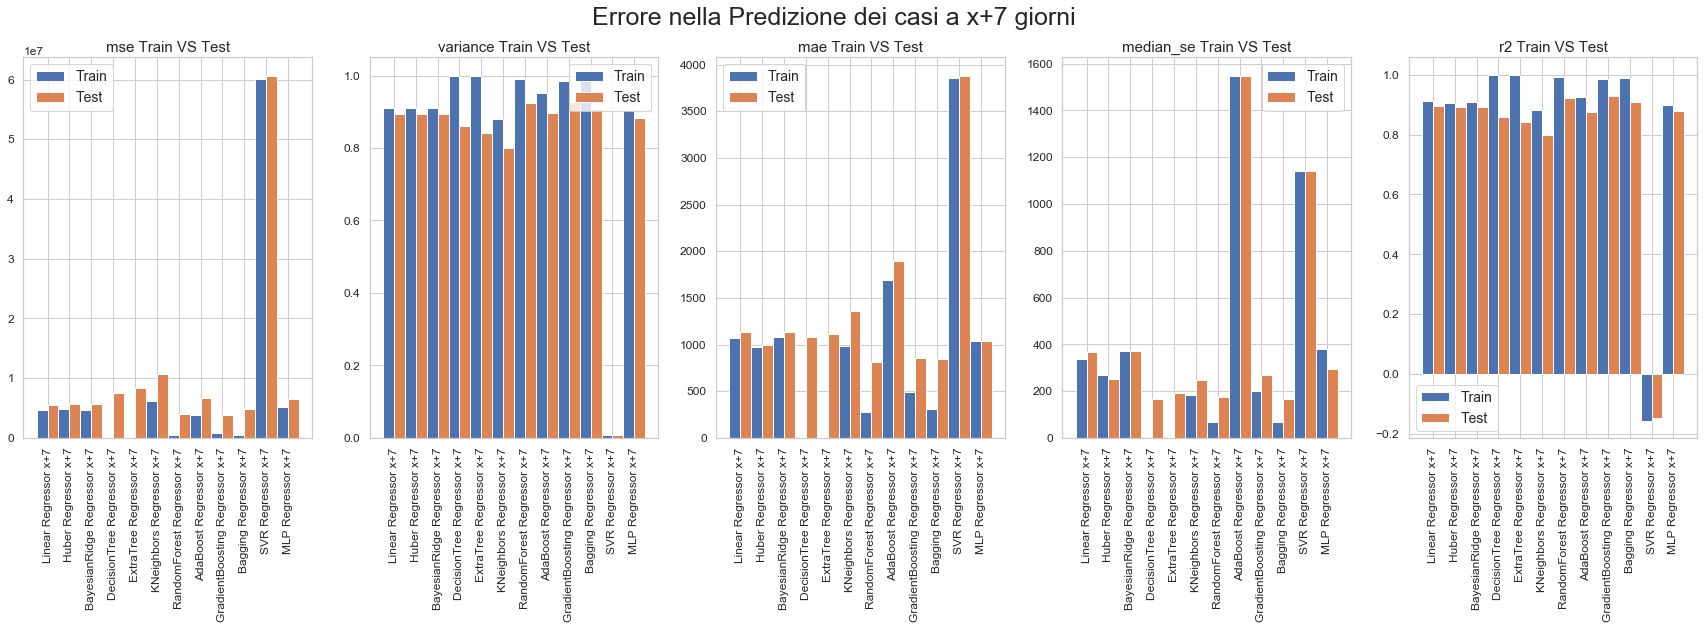

In [93]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+7 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA7,score_df_test_DELTA7,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+7 giorni")

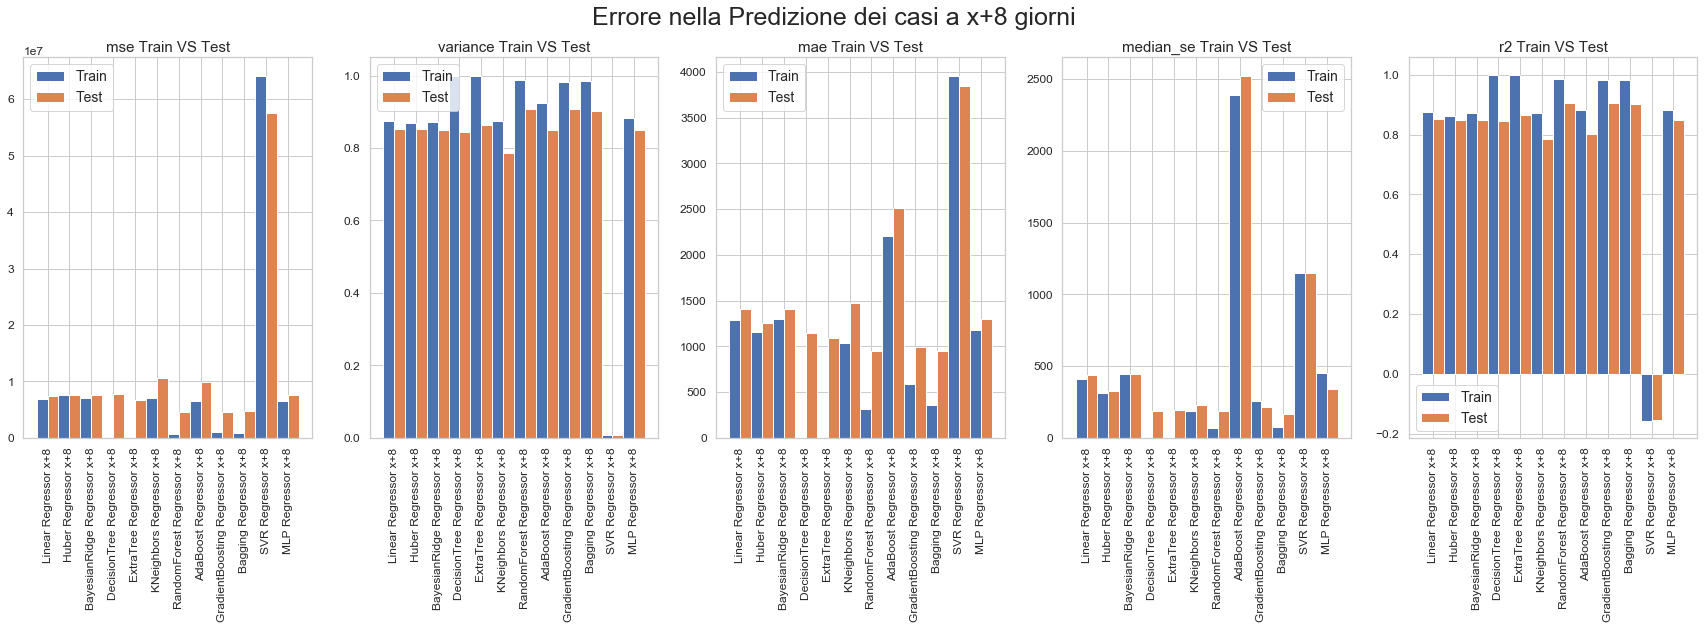

In [94]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1,5, sharex=True)
fig.suptitle("Errore nella Predizione dei casi a x+8 giorni",fontsize=25)

fig.set_size_inches(30,7)
Function(score_df_train_DELTA8,score_df_test_DELTA8,ax1,ax2,ax3,ax4,ax5)
# save_fig("Errore nella Predizione dei casi a x+8 giorni")

Com'era normale aspettarsi, sul test set si ottengono risultati leggermente peggiori in certi casi, dovuti al fatto che il train set è il dataset su cui gli algoritmi si sono addestrati. Nonostante ciò, non si notano grandi differenze tra test e train, concludendo quindi che il processo di regressione è corretto.

Possiamo in più notare che utilizzando come train_set da addestrare un DataFrame che possiede più dati anzicchè i singoli nuoviCasi e gli aumenti o decrementi di essi a distanza di x+DELTA[i] giorni, otteniamo Performance migliori. 

Questo è dovuto alla forte correlazione che vi è tra gli attributi del nostro DataFrame da ddestrare:
[Confermati,Nuovi casi,Ricoverati,Nuovi Ricoverati,Morti,Nuovi morti,Lockdown] 

### Per concludere dalle varie analisi sulle previsioni dei regressori con un delta che varia tra 1 e 8 giorni, vediamo che è possile definire che si ha minor errore nelle previsioni ad un giorno di Distanza, anche perchè è un'osservazione molto prevedibile poichè abbiamo una differenza tra Nuovi_casi giorno x e Nuovi_casi giorno x+1 più vicina allo zero, che va a indicare una somiglianza nel valore delle due celle.